<a href="https://colab.research.google.com/github/Kusasa/Exploratory-Data-Analysis---Kaggle-Survey/blob/main/EDA_for_Aspiring_Data_Scientists_in_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 [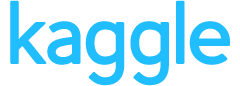](https://www.kaggle.com/) **SURVEY 2020:**
*Data exploration*

# **Prepare environment**

## Download Missing Libraries

In [ ]:
! python --version

Python 3.7.10


In [ ]:
! pip install geopandas

In [ ]:
! pip3 install simple_colors

In [ ]:
! pip3 install ggplot
! pip3 install tslib

## Import Libraries

In [ ]:
import geopandas as gpd
from google.colab import drive
from matplotlib import pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotnine
from plotnine import *
import seaborn as sns
from simple_colors import *
import warnings

## Map Google Drive

In [ ]:
drive.mount('/content/G-drive')

Mounted at /content/G-drive


##Set current working directory

In [ ]:
os.chdir('/content/G-drive/My Drive/Machine_Learning/2020_Kaggle_Survey')

#**Data Cleaning & Transformation**

## Read Data

In [ ]:
# Sourced Data
raw_survey_df = pd.read_csv("./Raw_Survey/kaggle_survey_2020_responses.csv", skiprows=[1])
survey_questions_df = pd.read_csv("./Raw_Survey/kaggle_survey_2020_responses.csv", nrows=1)

In [ ]:
display(survey_questions_df.head())
display(raw_survey_df.head())

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Variables in data set: \n".upper())

index = 0
for column in survey_questions_df.columns:
  print (str(index), column, ": ", survey_questions_df[column][0], "\n")
  index += 1

## Subset Data

### Subset Variables

In [ ]:
focus_columns = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,47,53, 54, 55, 56,57, 58, 59, 60, 61, 62, 63, 64,65,66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,107,108,109,110, 111, 112, 113, 114, 115, 116, 117,118,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,189,221, 222, 223, 224, 225, 226, 227, 228, 229, 230,231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,243,244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323]


In [ ]:
columned_survey_df = raw_survey_df.iloc[:,focus_columns]

In [ ]:
print("Shape of subset frame by focus columns: ", columned_survey_df.shape)
print("Shape of original frame: ", raw_survey_df.shape)

Shape of subset frame by focus columns:  (20036, 176)
Shape of original frame:  (20036, 355)


### Subset Entries (Data Scientists in African countries, USA & India)

In [ ]:
kaggle_countries = sorted(columned_survey_df.Q3.unique())

for country in kaggle_countries:
  print (country, "\n")

In [ ]:
african_countries = ['Egypt','Ghana','Kenya','Morocco','Nigeria','South Africa']
trendsetter_countries = ['India','United States of America']
focus_countries = african_countries + trendsetter_countries

In [ ]:
columned_survey_df.Q5.fillna("Unknown", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
kaggle_titles = sorted(columned_survey_df.Q5.unique())

for title in kaggle_titles:
  print (str(title), "\n")

Business Analyst 

Currently not employed 

DBA/Database Engineer 

Data Analyst 

Data Engineer 

Data Scientist 

Machine Learning Engineer 

Other 

Product/Project Manager 

Research Scientist 

Software Engineer 

Statistician 

Student 

Unknown 



In [ ]:
rowed_columned_survey_df = columned_survey_df[(columned_survey_df.Q3.isin(focus_countries)) & (columned_survey_df.Q5 == 'Data Scientist')]

In [ ]:
print("Shape of subset frame by focus columns & rows: ", rowed_columned_survey_df.shape)
print("Shape of original frame: ", raw_survey_df.shape)

Shape of subset frame by focus columns & rows:  (1130, 176)
Shape of original frame:  (20036, 355)


## Initial Feature Generation

In [ ]:
# New African or Trendsetter Column
rowed_columned_survey_df['E1'] = rowed_columned_survey_df.Q3.apply(lambda x: 'African Country' if x in african_countries else 'Trendsetter Country')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rowed_columned_survey_df.reset_index(drop=True, inplace=True)
rowed_columned_survey_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q11,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,...,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,E1
0,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years,Scikit-learn,TensorFlow,Keras,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trendsetter Country
1,18-21,Man,India,Bachelor’s degree,Data Scientist,3-5 years,Python,NaN,NaN,C,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,A personal computer or laptop,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years,Scikit-learn,NaN,Keras,NaN,NaN,NaN,...,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trendsetter Country
2,18-21,Man,India,Bachelor’s degree,Data Scientist,< 1 years,Python,R,SQL,C,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,A personal computer or laptop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,MySQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,NaN,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trendsetter Country
3,25-29,Woman,Egypt,Master’s degree,Data Scientist,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,A personal computer or laptop,Matplotlib,Seaborn,Plotly / Plotly Express,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-10 years,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,African Country
4,35-39,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL,"A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Seaborn,Plotly / Plotly Express,NaN,Shiny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Under 1 year,Scikit-learn,NaN,NaN,NaN,NaN,NaN,...,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trendsetter Country


# **Data Exploration**

*As the Kaggle [Executive Summary](https://storage.googleapis.com/kaggle-media/surveys/Kaggle%20State%20of%20Machine%20Learning%20and%20Data%20Science%202020.pdf) points out, India and the USA dominate participation representation on Kaggle. This study will therefore use these 2 countries as a comparison subset for the African countries (we'll hereby refer to this group of 2 countries as Trendsetter countries).*

*The insights from this exploratory data analysis are intended for professionals who are based in Africa, who intend to make a career change into the data science field.*

## Where are the data scientists?

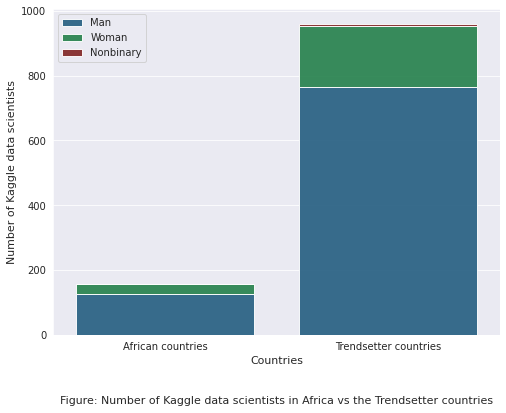

In [ ]:
percentageCount_ofTotal = []
percentageCount_ofTotal.append(rowed_columned_survey_df.groupby('E1').E1.count()['African Country'] / len (columned_survey_df[columned_survey_df.Q5 == 'Data Scientist']) * 100)
percentageCount_ofTotal.append(rowed_columned_survey_df.groupby('E1').E1.count()['Trendsetter Country'] / len (columned_survey_df[columned_survey_df.Q5 == 'Data Scientist']) * 100)

genderGroup = ['Man', 'Woman', 'Nonbinary']
genderGroup_order = genderGroup
summary_df = rowed_columned_survey_df[rowed_columned_survey_df.Q2.isin(genderGroup)].groupby(['Q2', 'E1']).size().reset_index().pivot(columns='Q2', index='E1', values=0)

sns.set_style('darkgrid')
plt.rcParams["axes.labelsize"] = 11
fig, ax = plt.subplots(figsize=(8, 6))
plot1 = sns.barplot(data=summary_df, x=summary_df.index, y='Man', ax=ax, alpha = 0.9, color='#14618f', label = 'Man')
plot2 = sns.barplot(data=summary_df, x=summary_df.index, y='Woman', ax=ax, alpha = 0.9, color='#148f47', bottom = summary_df['Man'], label = 'Woman')
plot3 = sns.barplot(data=summary_df, x=summary_df.index, y='Nonbinary', ax=ax, alpha = 0.9, color='#8f1414', bottom = summary_df['Man'] + summary_df['Woman'], label = 'Nonbinary')
ax.set(xlabel="Countries", ylabel = "Number of Kaggle data scientists", xticklabels=['African countries','Trendsetter countries'])
plt.legend()
plt.title('Figure: Number of Kaggle data scientists in Africa vs the Trendsetter countries', y=-0.23, fontsize = 11)
plt.show()

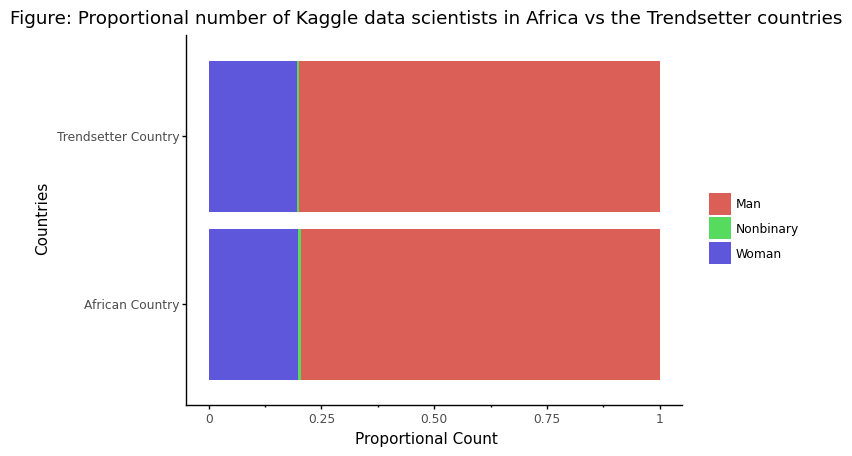

<ggplot: (8756505984949)>

In [ ]:
warnings.filterwarnings(module='plotnine*', action='ignore', category=FutureWarning)

(
    ggplot(rowed_columned_survey_df[rowed_columned_survey_df.Q2.isin(genderGroup)][["E1","Q2"]])
    + aes(x="E1", fill='Q2')
    + geom_bar(position="fill")
    + ylab("Proportional Count")
    + xlab("Countries")
    + ggtitle("Figure: Proportional number of Kaggle data scientists in Africa vs the Trendsetter countries")
    + coord_flip()
    + theme_classic()
    + theme(legend_title=element_text(text=""))
)

Despite the trendsetter countries being only composed of 2 countries (India and the USA), they represent over a third of Kaggle data scientis in the entire world. They also have around 6 times the number of Kaggle data scientists compared to the 6 African countries combined. Potentially, there is still a big job market potential data scientists in Africa. 

Both locally and abroad, female data scientists are dramatically under-representated. Understanding the drivers of this correlation, would be beneficial not only for the data science field, but also for Africa's fourth industrialization - as Africa has a high number of female-headed households. <br /><br />

---

In [ ]:
africa_countries_survey_df = rowed_columned_survey_df[rowed_columned_survey_df.E1 == 'African Country']
columned_africa_countries_survey_df =africa_countries_survey_df[['Q3','E1']]
condensed_africa_countries_survey_df = columned_africa_countries_survey_df.groupby("Q3", as_index = False).count().rename(columns={'E1': 'Count'})

world_countries_gdf = gpd.read_file('./Additional_Data/World_Countries.geojson')

condensed_africa_countries_survey_gdf = world_countries_gdf.merge(condensed_africa_countries_survey_df,left_on='COUNTRY', right_on='Q3', how='right', validate="one_to_one")
condensed_africa_countries_survey_gdf.drop(columns='COUNTRY', inplace=True)
condensed_africa_countries_survey_gdf

,geometry,Q3,Count
0,"MULTIPOLYGON (((32.64902 29.78836, 32.60791 29...",Egypt,17
1,"MULTIPOLYGON (((0.32238 6.03584, 0.35375 6.023...",Ghana,3
2,"MULTIPOLYGON (((33.92110 -1.00194, 33.92333 -0...",Kenya,25
3,"MULTIPOLYGON (((-3.38611 31.72611, -3.42000 31...",Morocco,19
4,"MULTIPOLYGON (((11.79944 7.29666, 11.75496 7.2...",Nigeria,70
5,"MULTIPOLYGON (((17.17166 -28.10226, 17.18902 -...",South Africa,24


In [ ]:
centroids_Q3 = condensed_africa_countries_survey_gdf['Q3']
centroids_x = condensed_africa_countries_survey_gdf.centroid.x
centroids_y = condensed_africa_countries_survey_gdf.centroid.y

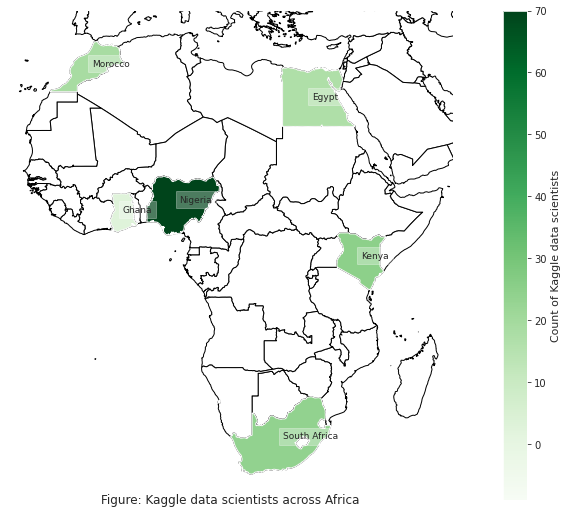

In [ ]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.axis('off')
minx, miny, maxx, maxy = condensed_africa_countries_survey_gdf.total_bounds
ax.set_xlim(minx - 7, maxx + 11)
ax.set_ylim(miny + 8, maxy + 5)
world_countries_gdf.plot(ax=ax, color='white', edgecolor='black')
condensed_africa_countries_survey_gdf.plot(column='Count', ax=ax, legend=True, legend_kwds={'label': "Count of Kaggle data scientists"}, cmap='Greens', vmin=-9, vmax=70)
for countryIndex in range(6):
  plt.text(centroids_x[countryIndex], centroids_y[countryIndex], centroids_Q3[countryIndex], bbox=dict(facecolor='white', alpha=0.3), fontdict=dict(fontsize = 9))
plt.title('Figure: Kaggle data scientists across Africa', pad = -650, fontsize = 12, )
plt.show()

Nigeria clearly has the most Kaggle data scientists in Africa. Out of 54 countries in Africa, it is shocking to see that only 6 of the countries appear to have data science activity. Again, this might also be an indicator of an untapped huge future job market potential in Africa.  <br /><br />


---



## What are the demographics of data scientists in Africa?

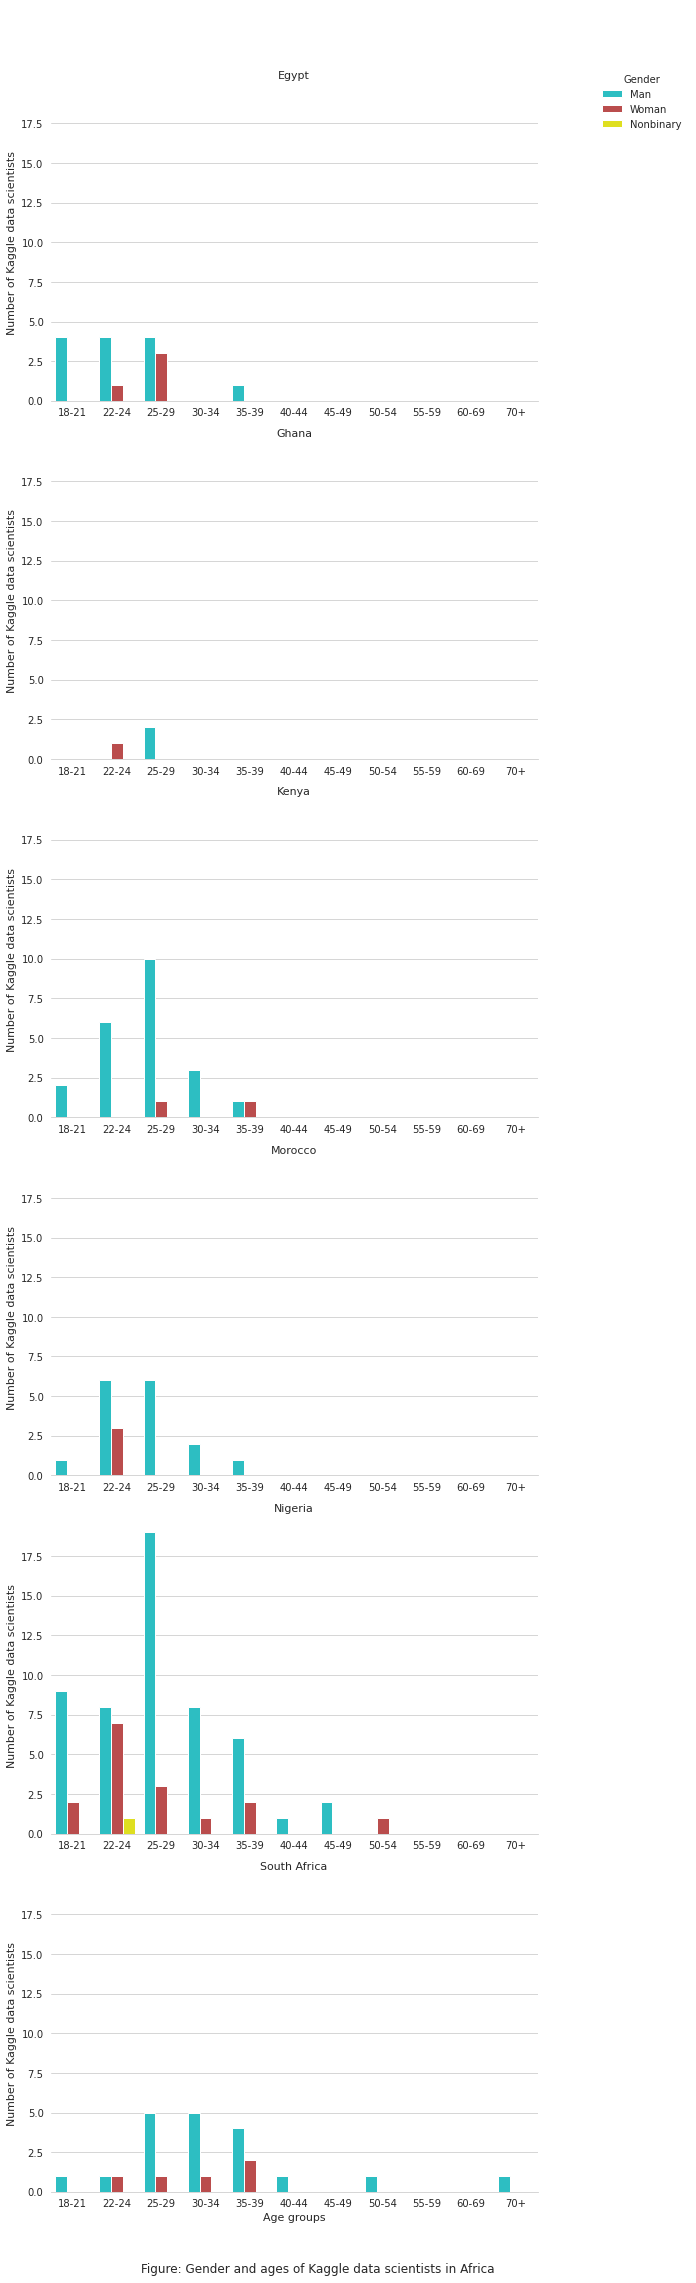

In [ ]:
# Age & gender per African country
ageGroup_order = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
genderGroup = ['Man', 'Woman', 'Nonbinary']
genderGroup_order = genderGroup

sns.set_style('whitegrid')
plot = sns.catplot(x='Q1', hue='Q2', data=africa_countries_survey_df[africa_countries_survey_df.Q2.isin(genderGroup)], sharex=False, aspect=(1.5),
            order = ageGroup_order, hue_order = genderGroup_order, kind='count', row = 'Q3', row_order = african_countries, sharey = True, palette = {'Man':'#14d5db', 'Woman':'#cc3b3b', 'Nonbinary':'yellow'})
plot.set_axis_labels("Age groups", "Number of Kaggle data scientists") \
  .set_titles("{row_name}") \
  .despine(left=True) \
  ._legend.set_title("Gender")
plot._legend.set_bbox_to_anchor((1.1,1.01))
plt.suptitle('Figure: Gender and ages of Kaggle data scientists in Africa', fontsize = 12, y = -0.02)
plt.show()


In line with the global trends, data science in Africa is still dominated by males across almost all age groups and countries. Also, most Kaggle data scientists in Africa are young adults across the countries (between 25 and 35 years old).   <br /><br />



---



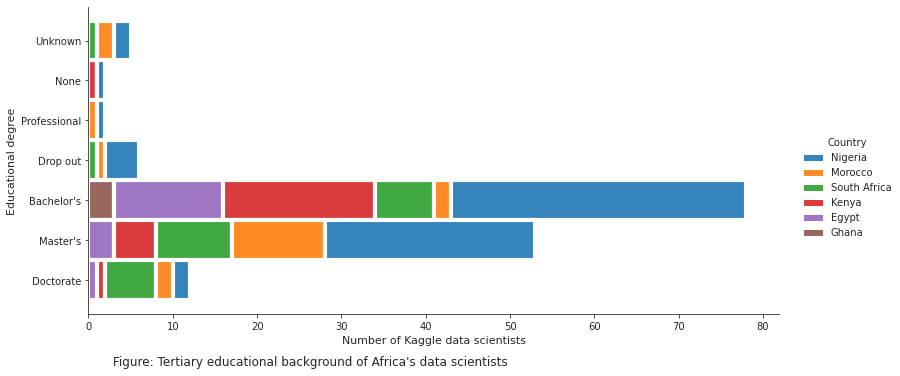

In [ ]:
# Education per African country
degree_order = {'I prefer not to answer':0,
       'No formal education past high school':1,
       'Professional degree':2,
       'Some college/university study without earning a bachelor’s degree':3,
       'Bachelor’s degree':4,
       'Master’s degree':5,
       'Doctoral degree':6}
education_ordered_africa_countries_survey_df = africa_countries_survey_df.sort_values(by=['Q4'], key=lambda x: x.map(degree_order)).reset_index(drop=True)


xticklabels = ['Unknown',
       'None',
       'Professional',
       'Drop out',
       'Bachelor\'s',
       'Master\'s',
       'Doctorate']

sns.set_style('ticks')
plot = sns.displot(data=education_ordered_africa_countries_survey_df, y='Q4', alpha = 0.9, hue='Q3', multiple='stack', aspect=30/10)
plot.set(ylabel="Educational degree", xlabel = "Number of Kaggle data scientists", yticklabels=xticklabels)
plot._legend.set_title("Country")
plt.suptitle('Figure: Tertiary educational background of Africa\'s data scientists', fontsize = 12, y = 0)
plt.show()


A huge majority of data scientists in Africa have a tertiary qualification. The biggest demographic being those that have a Bachelor's degree, followed by those that have a Master's degree. Even though it seems having a tertiary qualification positively correlates with getting a data scientist job, there is still a number of data scientists who secured a job without a tertiary qualification. Therefore not having a tertiary qualification is not a stubborn hindrance to securing a data scientist job in Africa.      <br /><br />



---



## What is the coding experience of these data scientists?

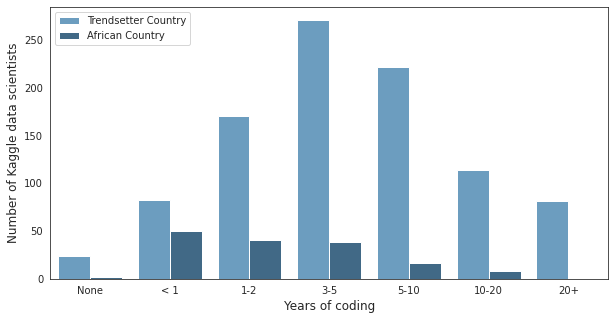

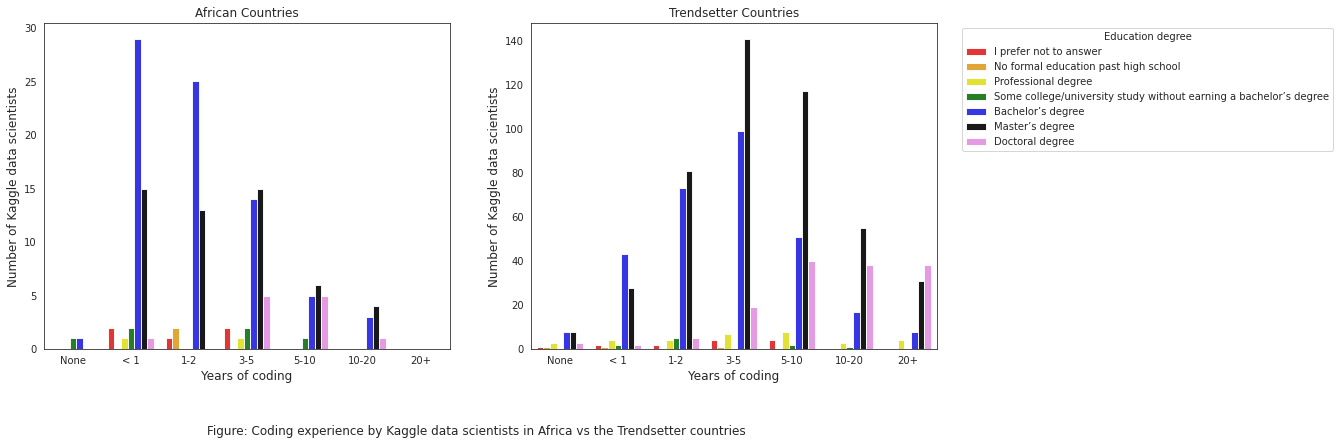

In [ ]:
# Years of Coding
Q6notna_rowed_columned_survey_df = rowed_columned_survey_df[~rowed_columned_survey_df.Q6.isna()]

codingYears_Order = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
xticklabels = ['None', '< 1', '1-2', '3-5', '5-10', '10-20', '20+']

sns.set_style('white')
plt.rcParams["axes.labelsize"] = 12
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=Q6notna_rowed_columned_survey_df, x='Q6', ax=ax, hue = 'E1', palette = 'Blues_d', order = codingYears_Order)
ax.set(xlabel="Years of coding", ylabel = "Number of Kaggle data scientists", xticklabels = xticklabels)
ax.legend(title='')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))
sns.countplot(data=Q6notna_rowed_columned_survey_df[Q6notna_rowed_columned_survey_df.E1=="African Country"], x='Q6', ax=ax1, hue = 'Q4', hue_order= degree_order, palette = ['red','orange', 'yellow', 'green', 'blue','black','violet'], alpha = 0.9, order = codingYears_Order)
ax1.set(xlabel="Years of coding", ylabel = "Number of Kaggle data scientists", xticklabels = xticklabels, title="African Countries")
ax1.legend().remove()
sns.countplot(data=Q6notna_rowed_columned_survey_df[Q6notna_rowed_columned_survey_df.E1=="Trendsetter Country"], x='Q6', ax=ax2, hue = 'Q4', hue_order= degree_order, palette = ['red','orange', 'yellow', 'green', 'blue','black','violet'], alpha = 0.9, order = codingYears_Order)
ax2.set(xlabel="Years of coding", ylabel = "Number of Kaggle data scientists", xticklabels = xticklabels, title="Trendsetter Countries")
ax2.legend(title='Education degree', bbox_to_anchor=(1.05, 1))
plt.suptitle('Figure: Coding experience by Kaggle data scientists in Africa vs the Trendsetter countries', y=-0.05, fontsize = 12)
plt.show()

In [ ]:
codingYears_Order.reverse()

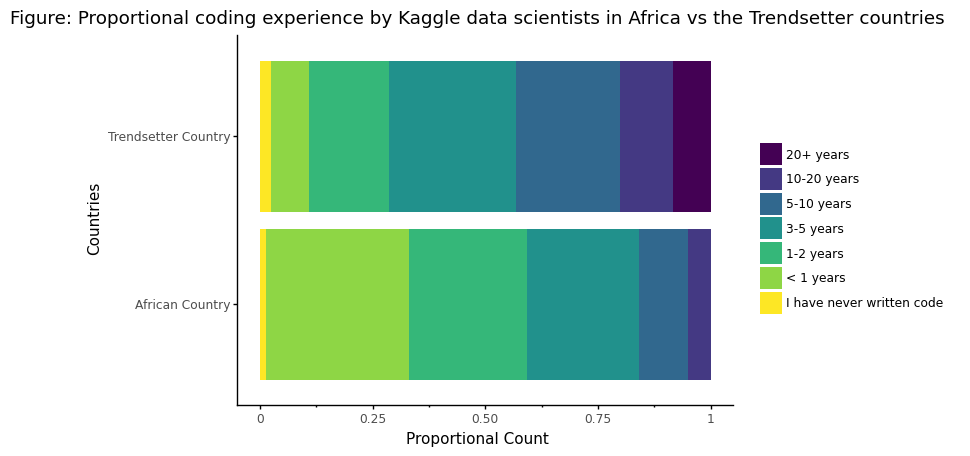

<ggplot: (8756494829193)>

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
    Q6notna_rowed_columned_survey_df['Q6']  = pd.Categorical(Q6notna_rowed_columned_survey_df['Q6'], categories=codingYears_Order, ordered=True)

warnings.filterwarnings(module='plotnine*', action='ignore', category=FutureWarning)

(
    ggplot(Q6notna_rowed_columned_survey_df)
    + aes(x="E1", fill='Q6')
    + geom_bar(position="fill")
    + ylab("Proportional Count")
    + xlab("Countries")
    + ggtitle("Figure: Proportional coding experience by Kaggle data scientists in Africa vs the Trendsetter countries")
    + coord_flip()
    + theme_classic()
    + theme(legend_title=element_text(text=""))
)


Compared to the trendsetter countries, Kaggle data scientists in Africa tend to have much less years of coding experience. A handful of Africa's data scientists don't even have coding experience. The coding experience requirement in order to become hired as a data scientists seems lower than most of us may expect. 

In the trendsetter countries, the dominant years-of-coding group is most influenced by the data scientists with masters degrees. Whereas in the African countries, the dominant years-of-coding group is most influenced by the data scientists with lower hierarchy degrees (bachelor degrees). 
 <br /><br />



---



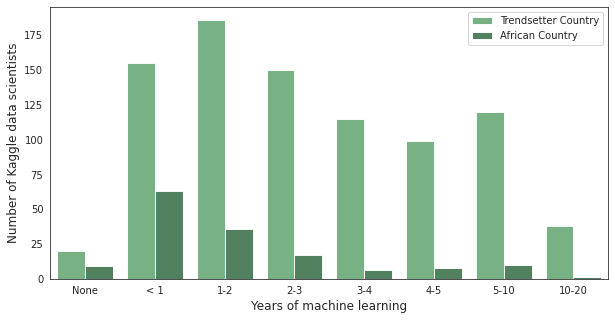

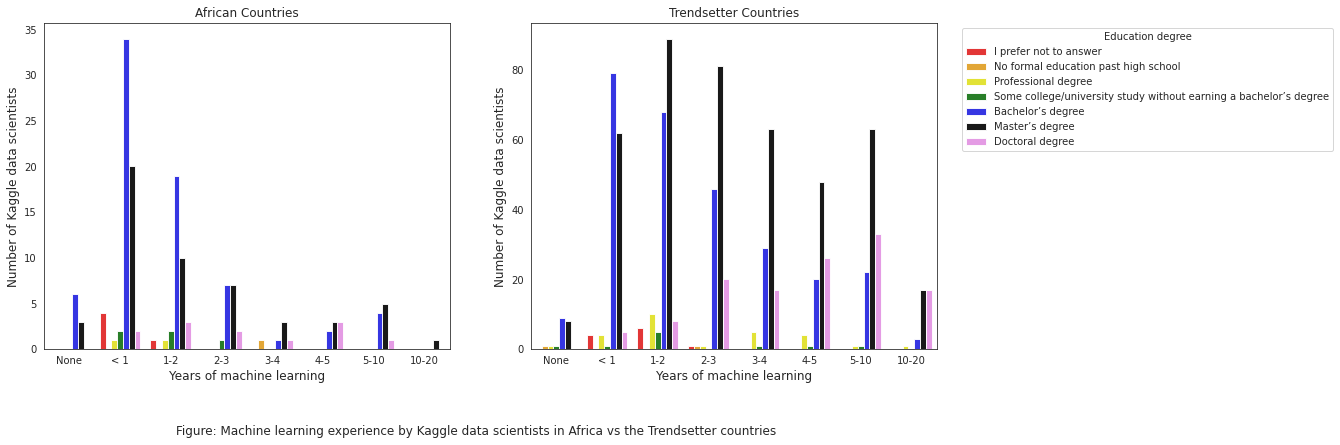

In [ ]:
# Years machine learning
Q15notna_rowed_columned_survey_df = rowed_columned_survey_df[~rowed_columned_survey_df.Q15.isna()]

machineYears_Order = ['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years','5-10 years', '10-20 years']
xticklabels = ['None', '< 1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-20']

plt.rcParams["axes.labelsize"] = 12
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=Q15notna_rowed_columned_survey_df, x='Q15', ax=ax, alpha = 0.9, order = machineYears_Order, capsize=0.1, palette = 'Greens_d', hue = 'E1')
ax.set(xlabel="Years of machine learning", ylabel = "Number of Kaggle data scientists", xticklabels = xticklabels)
ax.legend(title='')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))
sns.countplot(data=Q15notna_rowed_columned_survey_df[Q15notna_rowed_columned_survey_df.E1=="African Country"], x='Q15', ax=ax1, hue = 'Q4', hue_order= degree_order, palette = ['red','orange', 'yellow', 'green', 'blue','black','violet'], alpha = 0.9, order = machineYears_Order)
ax1.set(xlabel="Years of machine learning", ylabel = "Number of Kaggle data scientists", xticklabels = xticklabels, title="African Countries")
ax1.legend().remove()
sns.countplot(data=Q15notna_rowed_columned_survey_df[Q15notna_rowed_columned_survey_df.E1=="Trendsetter Country"], x='Q15', ax=ax2, hue = 'Q4', hue_order= degree_order, palette = ['red','orange', 'yellow', 'green', 'blue','black','violet'], alpha = 0.9, order = machineYears_Order)
ax2.set(xlabel="Years of machine learning", ylabel = "Number of Kaggle data scientists", xticklabels = xticklabels, title="Trendsetter Countries")
ax2.legend(title='Education degree', bbox_to_anchor=(1.05, 1))
plt.suptitle('Figure: Machine learning experience by Kaggle data scientists in Africa vs the Trendsetter countries', y=-0.05, fontsize = 12)
plt.show()

In [ ]:
machineYears_Order = ['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years','5-10 years', '10-20 years', '20 or more years']
machineYears_Order.reverse()

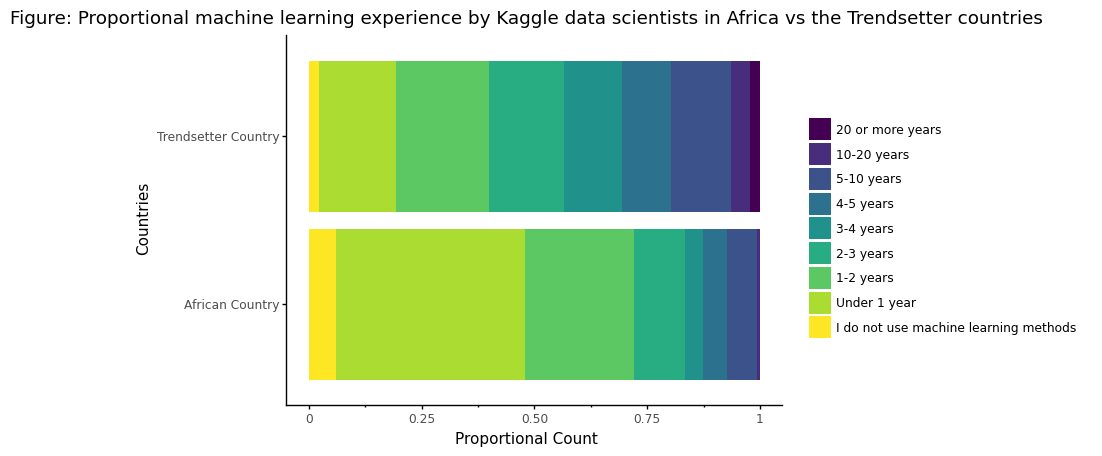

<ggplot: (8756494502161)>

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
    Q15notna_rowed_columned_survey_df['Q15']  = pd.Categorical(Q15notna_rowed_columned_survey_df['Q15'], categories=machineYears_Order, ordered=True)

warnings.filterwarnings(module='plotnine*', action='ignore', category=FutureWarning)

(
    ggplot(Q15notna_rowed_columned_survey_df)
    + aes(x="E1", fill='Q15')
    + geom_bar(position="fill")
    + ylab("Proportional Count")
    + xlab("Countries")
    + ggtitle("Figure: Proportional machine learning experience by Kaggle data scientists in Africa vs the Trendsetter countries")
    + coord_flip()
    + theme_classic()
    + theme(legend_title=element_text(text=""))
)

In [ ]:
NoML_df = Q15notna_rowed_columned_survey_df[Q15notna_rowed_columned_survey_df.Q15 == 'I do not use machine learning methods'][['Q15', 'Q1', 'Q4', 'Q20', 'Q21', 'Q22', 'Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER']]

print (black("Ages of data scientists that don't use ML:\n", 'bold'), NoML_df.Q1.value_counts(), '\n')

print (black("Educational background of data scientists that don't use ML:\n", 'bold'), NoML_df.Q4.value_counts(), '\n')

print (black("Company size of data scientists that don't use ML:\n", 'bold'), NoML_df.Q20.value_counts(), '\n')

print (black("Data science team size of data scientists that don't use ML:\n", 'bold'), NoML_df.Q21.value_counts(), '\n')

print (black("Company ML-application of data scientists that don't use ML:\n", 'bold'), NoML_df.Q22.value_counts(), '\n')

task_NoML_df = NoML_df[['Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER']]
melted_task_NoML_df = task_NoML_df.melt()
melted_task_NoML_df = melted_task_NoML_df[melted_task_NoML_df.value.notna()]

print (black("Main work tasks of data scientists that don't use ML:\n", 'bold'), melted_task_NoML_df.value.value_counts(), '\n')


Ages of data scientists that don't use ML:
 25-29    10
22-24     9
18-21     7
50-54     1
40-44     1
35-39     1
Name: Q1, dtype: int64 

Educational background of data scientists that don't use ML:
 Bachelor’s degree                                                    15
Master’s degree                                                      11
Professional degree                                                   1
No formal education past high school                                  1
Some college/university study without earning a bachelor’s degree     1
Name: Q4, dtype: int64 

Company size of data scientists that don't use ML:
 0-49 employees              22
1000-9,999 employees         4
10,000 or more employees     2
Name: Q20, dtype: int64 

Data science team size of data scientists that don't use ML:
 0        10
1-2       8
20+       5
3-4       3
10-14     1
Name: Q21, dtype: int64 

Company ML-application of data scientists that don't use ML:
 No (we do not use ML methods)  

Interestingly, in terms of years of machine learning (ML), Kaggle data scientists in Africa show the same pattern of experience as the trendsetter countries- whereby most data scientists have less than 2 years of ML experience. Surprisingly, both in Africa and in the trendsetter countries, there is some data scientists who do not even use machine learning in their jobs.

The machine learning data scientiests in the trendsetters tend to have more higher level degrees (masters and doctorates) compared to africa (bachelors).

The data scientists which have no ML experience:
- They are mostly young (in their late twenties), and are degree holders. Therefore they are likely to be entry level data scientists.
- They tend to be working for small companies and in small teams. Therefore their limited man hours may be overoccupied by the lower heirarchy data science tasks.
- They usually work on building and maintaining data infrastructure, and also using the data to do analyses that feed business insights.  <br /><br />



---



In [ ]:
# Programming Languages by country groups
coding_rowed_columned_survey_df = rowed_columned_survey_df[['E1', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8']]
melted_coding_rowed_columned_survey_df = coding_rowed_columned_survey_df.melt(id_vars=['E1','Q8'])
melted_coding_rowed_columned_survey_df = melted_coding_rowed_columned_survey_df[melted_coding_rowed_columned_survey_df.value.notna()]

grouped_coding_rowed_columned_survey_df = melted_coding_rowed_columned_survey_df.groupby(by=['E1','value'])[['value']].count().rename(columns={'value': 'Count'})
grouped_coding_rowed_columned_survey_df = grouped_coding_rowed_columned_survey_df.reset_index().rename(columns={'value': 'Q7'})
africatop3_coding_rowed_columned_survey_df = grouped_coding_rowed_columned_survey_df[grouped_coding_rowed_columned_survey_df.E1 == 'African Country'].sort_values('Count', ascending=False)[:3]
trendsettertop3_coding_rowed_columned_survey_df = grouped_coding_rowed_columned_survey_df[grouped_coding_rowed_columned_survey_df.E1 == 'Trendsetter Country'].sort_values('Count', ascending=False)[:3]

top3s_current_coding_rowed_columned_survey_df = africatop3_coding_rowed_columned_survey_df.append(trendsettertop3_coding_rowed_columned_survey_df).reset_index(drop=True)

In [ ]:
grouped_coding_rowed_columned_survey_df = rowed_columned_survey_df.groupby(by=['E1','Q8'])[['Q8']].count().rename(columns={'Q8': 'Count'})
grouped_coding_rowed_columned_survey_df = grouped_coding_rowed_columned_survey_df.reset_index()
africatop3_coding_rowed_columned_survey_df = grouped_coding_rowed_columned_survey_df[grouped_coding_rowed_columned_survey_df.E1 == 'African Country'].sort_values('Count', ascending=False)[:3]
trendsettertop3_coding_rowed_columned_survey_df = grouped_coding_rowed_columned_survey_df[grouped_coding_rowed_columned_survey_df.E1 == 'Trendsetter Country'].sort_values('Count', ascending=False)[:3]

top3s_suggested_coding_rowed_columned_survey_df = africatop3_coding_rowed_columned_survey_df.append(trendsettertop3_coding_rowed_columned_survey_df).reset_index(drop=True)

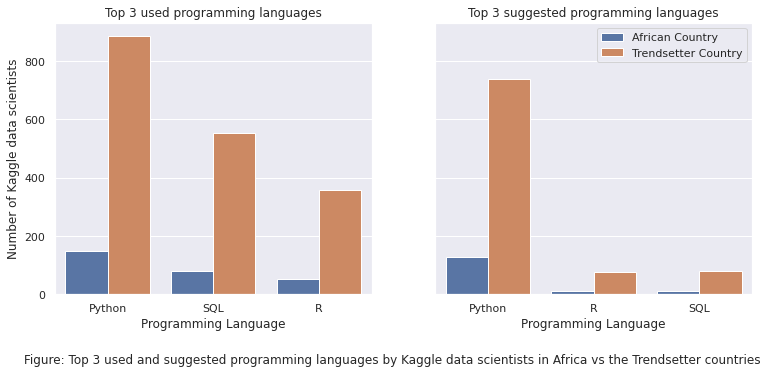

In [ ]:
sns.set()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12.5, 5), sharey = True)
sns.barplot(data=top3s_current_coding_rowed_columned_survey_df, x='Q7', y='Count', ax=ax1, hue='E1')
ax1.set(xlabel="Programming Language", ylabel = "Number of Kaggle data scientists", title = 'Top 3 used programming languages')
ax1.get_legend().remove()
sns.barplot(data=top3s_suggested_coding_rowed_columned_survey_df, x='Q8', y='Count', ax=ax2, hue='E1')
ax2.set(xlabel="Programming Language", ylabel = None, title = 'Top 3 suggested programming languages')
ax2.legend(title='')
plt.suptitle('Figure: Top 3 used and suggested programming languages by Kaggle data scientists in Africa vs the Trendsetter countries', y=-0.04, fontsize = 12)
plt.show()

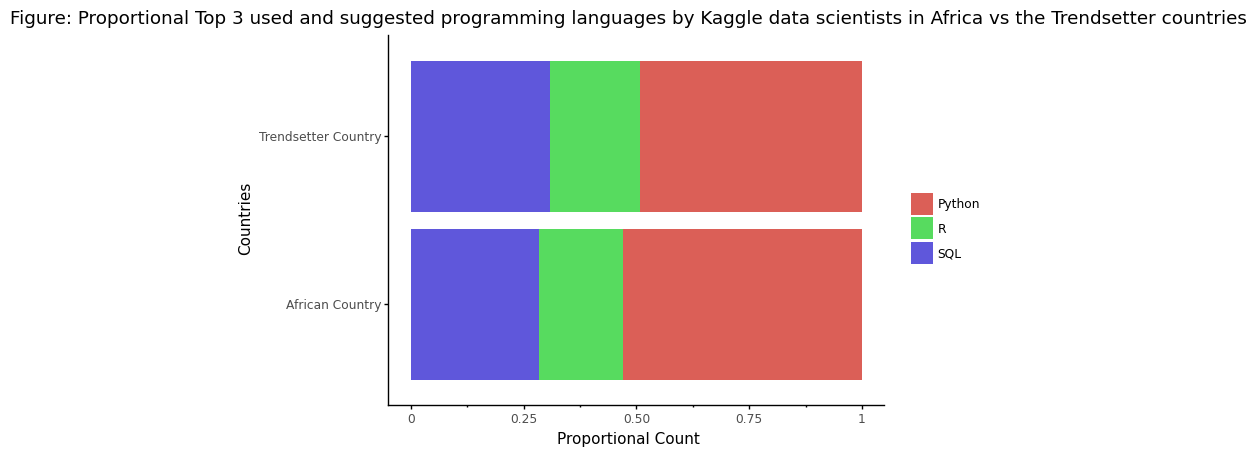

<ggplot: (8756494711997)>


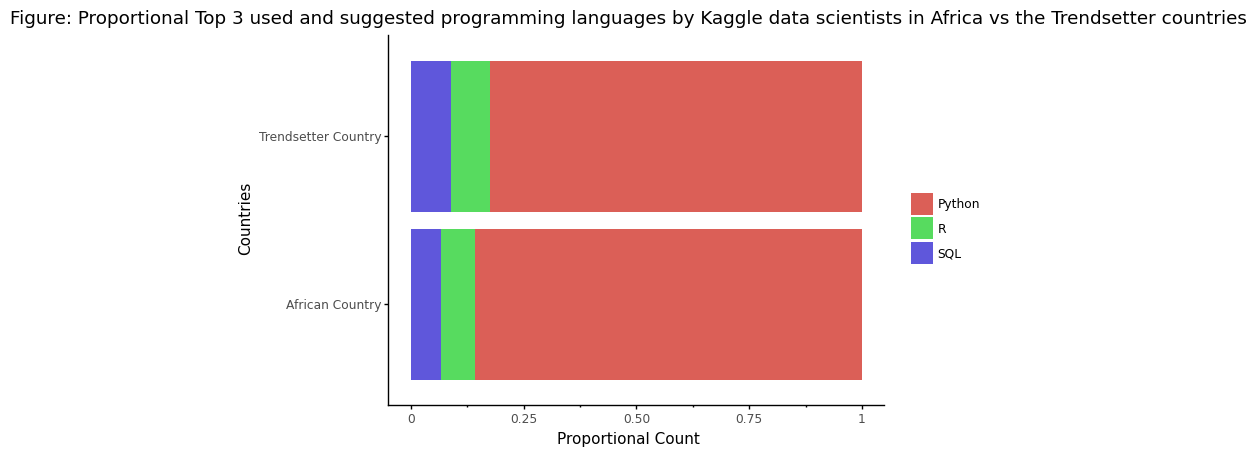

<ggplot: (8756496910005)>


In [ ]:
warnings.filterwarnings(module='plotnine*', action='ignore', category=FutureWarning)

print(
    ggplot(top3s_current_coding_rowed_columned_survey_df)
    + aes(x="E1", fill='Q7', y="Count")
    + geom_bar(position="fill", stat = "identity")
    + ylab("Proportional Count")
    + xlab("Countries")
    + ggtitle("Figure: Proportional Top 3 used and suggested programming languages by Kaggle data scientists in Africa vs the Trendsetter countries")
    + coord_flip()
    + theme_classic()
    + theme(legend_title=element_text(text=""))
)
print(
    ggplot(top3s_suggested_coding_rowed_columned_survey_df)
    + aes(x="E1", fill='Q8', y="Count")
    + geom_bar(position="fill", stat = "identity")
    + ylab("Proportional Count")
    + xlab("Countries")
    + ggtitle("Figure: Proportional Top 3 used and suggested programming languages by Kaggle data scientists in Africa vs the Trendsetter countries")
    + coord_flip()
    + theme_classic()
    + theme(legend_title=element_text(text=""))
)


The exact same pattern happens globally, python is the most used programming language of data science workflows, followed by sql for storing and accessing structured data. Then thirdly, R is still heavily used by some data scientiests as an alternative to python.      <br /><br />



---



In [ ]:
# Programming Languages by countries
coding_africa_countries_survey_df = africa_countries_survey_df[['Q3', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8']]
melted_coding_africa_countries_survey_df = coding_africa_countries_survey_df.melt(id_vars=['Q3','Q8'])
melted_coding_africa_countries_survey_df = melted_coding_africa_countries_survey_df[melted_coding_africa_countries_survey_df.value.notna()]

grouped_coding_africa_countries_survey_df = melted_coding_africa_countries_survey_df.groupby(by=['Q3','value'])[['value']].count().rename(columns={'value': 'Count'})
grouped_coding_africa_countries_survey_df = grouped_coding_africa_countries_survey_df.reset_index().rename(columns={'value': 'Q7'})

top3s_current_coding_africa_countries_survey_df = pd.DataFrame(columns=["Q3","Q7","Count"])
for country in grouped_coding_africa_countries_survey_df.Q3.unique():
  top3s_current_coding_africa_countries_survey_df = top3s_current_coding_africa_countries_survey_df.append(grouped_coding_africa_countries_survey_df[grouped_coding_africa_countries_survey_df.Q3 == country].sort_values('Count', ascending=False)[:3])


In [ ]:
grouped_coding_africa_countries_survey_df = africa_countries_survey_df.groupby(by=['Q3','Q8'])[['Q8']].count().rename(columns={'Q8': 'Count'})
grouped_coding_africa_countries_survey_df = grouped_coding_africa_countries_survey_df.reset_index()

top3s_suggested_coding_africa_countries_survey_df = pd.DataFrame(columns=["Q3","Q8","Count"])
for country in grouped_coding_africa_countries_survey_df.Q3.unique():
  top3s_suggested_coding_africa_countries_survey_df = top3s_suggested_coding_africa_countries_survey_df.append(grouped_coding_africa_countries_survey_df[grouped_coding_africa_countries_survey_df.Q3 == country].sort_values('Count', ascending=False)[:3])


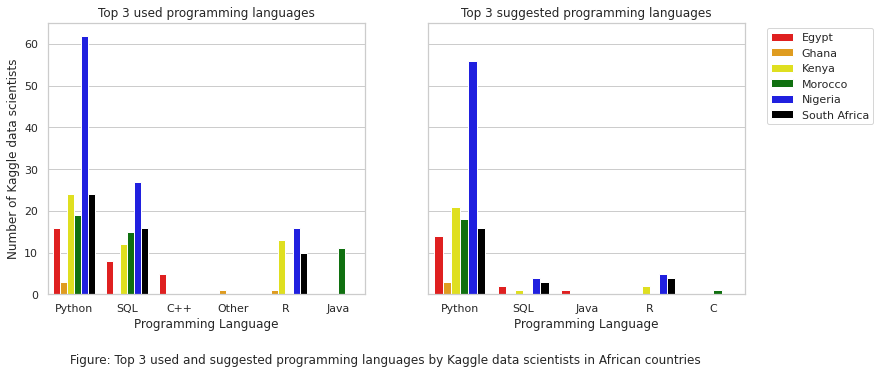

In [ ]:
sns.set_style("whitegrid")
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12.5, 5), sharey = True)
sns.barplot(data=top3s_current_coding_africa_countries_survey_df, x='Q7', y='Count', ax=ax1, hue='Q3', palette=['red','orange', 'yellow', 'green', 'blue','black','violet'])
ax1.set(xlabel="Programming Language", ylabel = "Number of Kaggle data scientists", title = 'Top 3 used programming languages')
ax1.get_legend().remove()
sns.barplot(data=top3s_suggested_coding_africa_countries_survey_df, x='Q8', y='Count', ax=ax2, hue='Q3', palette=['red','orange', 'yellow', 'green', 'blue','black','violet'])
ax2.set(xlabel="Programming Language", ylabel = None, title = 'Top 3 suggested programming languages')
ax2.legend(title='', bbox_to_anchor=(1.05, 1))
plt.suptitle('Figure: Top 3 used and suggested programming languages by Kaggle data scientists in African countries', y=-0.04, fontsize = 12)
plt.show()


With regards to programming languages used and suggested, the pattern is the same between the African countries. Python is by far the most used programming language by the data scientists, followed by SQL and R. It's worth mentioning the heavy use of C, C++ and Java in some African countries - these are most probably used in the data engineering and production phases of the data science workflow. In that order, this seems like the order of priority that a budding data scientist must use in his/her learning journey.      <br /><br />



---



## What are the working conditions for data scientists in Africa?

In [ ]:
# Compensation
africa_compensation_survey_df = africa_countries_survey_df.dropna(subset=["Q24"])
africa_compensation_survey_df = africa_compensation_survey_df.replace({'Q24' : '$0-999'}, value='0-999')
africa_compensation_survey_df['E2'] = africa_compensation_survey_df.Q24.str.split("-", 1, expand=True)[1].str.replace(',','').astype('int32')
africa_compensation_survey_df.reset_index(drop=True, inplace=True)

compensation_rowed_columned_survey_df = rowed_columned_survey_df.dropna(subset=["Q24"])
compensation_rowed_columned_survey_df = compensation_rowed_columned_survey_df.replace({'Q24':'$0-999', 'Q24':'> $500,000'}, value={'Q24':'0-999', 'Q24':'500,000'})
compensation_rowed_columned_survey_df['E2'] = compensation_rowed_columned_survey_df.Q24.str.split("-", 1, expand=True)[1].fillna("500,000").str.replace(',','').astype('int32')
compensation_rowed_columned_survey_df.reset_index(drop=True, inplace=True)

print (black("Annual compensation of data scientists in Africa:\n", 'bold'), africa_compensation_survey_df.E2.describe(), "\n")
print (black("Annual compensation of data scientists in the Trendsetter countries:\n", 'bold'), compensation_rowed_columned_survey_df[compensation_rowed_columned_survey_df.E1 == "Trendsetter Country"].E2.describe(), '\n')

Annual compensation of data scientists in Africa:
 count       141.000000
mean      14967.085106
std       29747.461642
min         999.000000
25%         999.000000
50%        1999.000000
75%        9999.000000
max      124999.000000
Name: E2, dtype: float64 

Annual compensation of data scientists in the Trendsetter countries:
 count       856.000000
mean      82406.150701
std      101673.338323
min         999.000000
25%        4749.000000
50%       34999.000000
75%      124999.000000
max      500000.000000
Name: E2, dtype: float64 



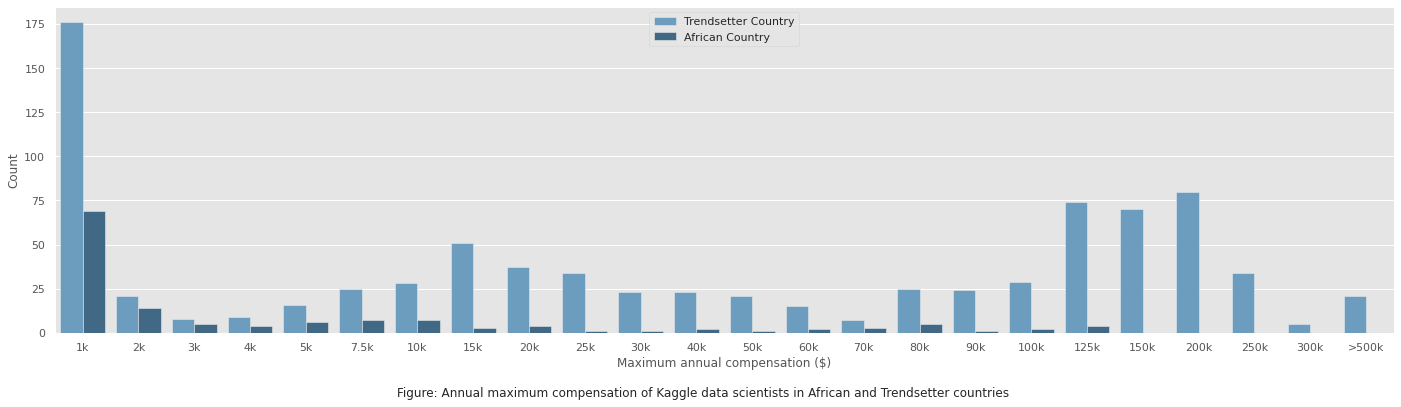

In [ ]:
array = np.array(sorted(compensation_rowed_columned_survey_df.E2.unique())).astype(str)
xticklabels = [(str(int(int(value) + 1)/1000).replace(".0", "") + "k") for value in array[:-1]]
xticklabels.append('>500k')

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(24, 6))
plot = sns.countplot(x='E2', data=compensation_rowed_columned_survey_df, ax=ax, hue= 'E1', palette = 'Blues_d')
ax.set(ylabel="Count", xlabel = "Maximum annual compensation ($)", xticklabels = xticklabels)
ax.legend(title='')
plt.suptitle('Figure: Annual maximum compensation of Kaggle data scientists in African and Trendsetter countries', fontsize = 12, y = 0)
plt.show()

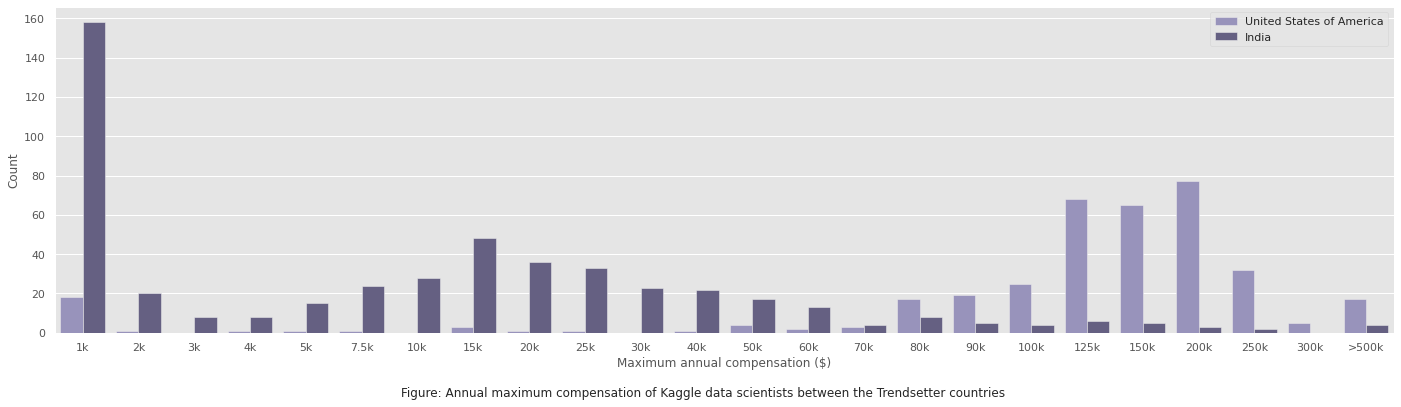

In [ ]:
array = np.array(sorted(compensation_rowed_columned_survey_df[compensation_rowed_columned_survey_df.E1 == 'Trendsetter Country'].E2.unique())).astype(str)
xticklabels = [(str(int(int(value) + 1)/1000).replace(".0", "") + "k") for value in array[:-1]]
xticklabels.append('>500k')

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(24, 6))
plot = sns.countplot(x='E2', data=compensation_rowed_columned_survey_df[compensation_rowed_columned_survey_df.E1 == 'Trendsetter Country'], ax=ax, hue= 'Q3', palette = 'Purples_d')
ax.set(ylabel="Count", xlabel = "Maximum annual compensation ($)", xticklabels = xticklabels)
ax.legend(title='')
plt.suptitle('Figure: Annual maximum compensation of Kaggle data scientists between the Trendsetter countries', fontsize = 12, y = 0)
plt.show()

In [ ]:
compensation_rowed_columned_survey_df2 = compensation_rowed_columned_survey_df[['E1','E2']]
compensation_order_int = sorted(compensation_rowed_columned_survey_df2.E2.unique())
compensation_order_int.reverse()
compensation_order = [(str(int(int(value) + 1)/1000).replace(".0", "") + "k") if value !=500000 else "500k" for value in compensation_order_int]

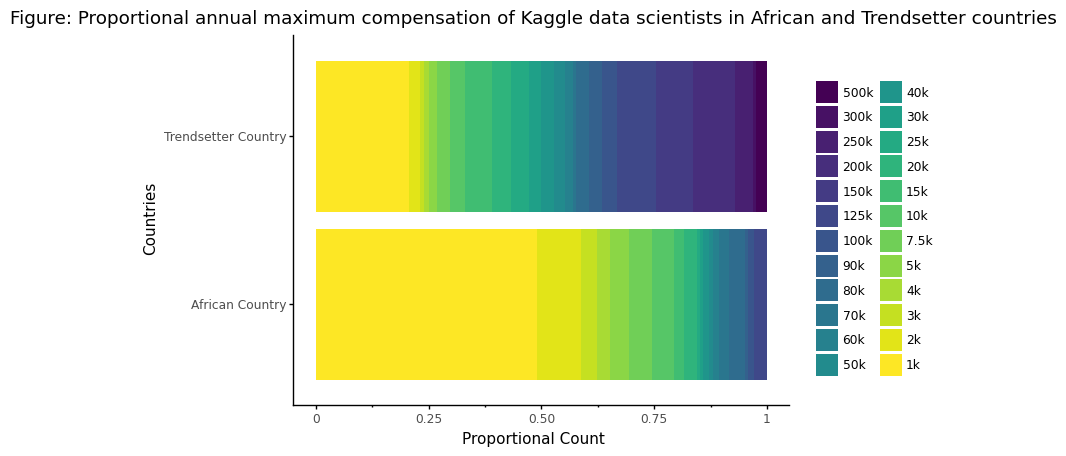

<ggplot: (8756487620633)>

In [ ]:
with warnings.catch_warnings():
  warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
  compensation_rowed_columned_survey_df2 = compensation_rowed_columned_survey_df[['E1','E2']]
  compensation_rowed_columned_survey_df2['E2']  = compensation_rowed_columned_survey_df2.E2.dropna()
  compensation_rowed_columned_survey_df2['E3']  = pd.Categorical([(str(int(int(value) + 1)/1000).replace(".0", "") + "k") if value !=500000 else "500k" for value in compensation_rowed_columned_survey_df2.E2], categories=compensation_order, ordered=True)

warnings.filterwarnings(module='plotnine*', action='ignore', category=FutureWarning)


(
    ggplot(compensation_rowed_columned_survey_df2)
    + aes(x="E1", fill='E3')
    + geom_bar(position="fill")
    + ylab("Proportional Count")
    + xlab("Countries")
    + ggtitle("Figure: Proportional annual maximum compensation of Kaggle data scientists in African and Trendsetter countries")
    + coord_flip()
    + theme_classic()
    + theme(legend_title=element_text(text=""))
)


It's not surprising that there is a huge number of data scientists that earn are part of the lowest compensation tier - given data science's recent rise as an attractive job prospect for new employees (including graduates and professionals switching to the data science field). 

At entrant job level, the is the same pattern of compensation in Africa as compared to the Trendsetter countries. The massive difference starts showing at the mid and top tiers of the data science job market. On average, the Kaggle data scientists in Africa earn around 15 000 US Dollars per annum, versus the Trendsetters' 83 000 US Dollas per annum (an increase of almost 600%). Africa's biggest earners get around 124 000 US Dollars per annum, versus the trendsetters' >500 000 US Dollars per annum (an increase at least 400%).

Interestingly, amongst the trendsetter countries, it is the data scientists in the USA that tend to earn the big bucks. <br /><br />



---



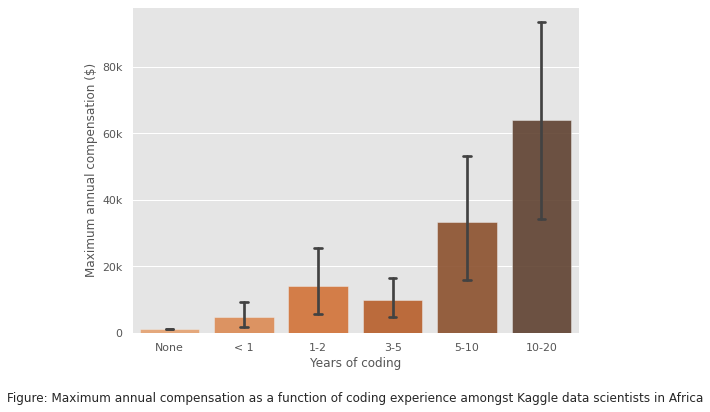

In [ ]:
# Years coding on Compensation
Q6notna_africa_compensation_survey_df = africa_compensation_survey_df[~africa_compensation_survey_df.Q6.isna()]

codingYears_Order = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years']
xticklabels = ['None', '< 1', '1-2', '3-5', '5-10', '10-20']
yticklabels = ['0','20k','40k','60k','80k']

plt.rcParams["axes.labelsize"] = 12
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=Q6notna_africa_compensation_survey_df, x='Q6', y='E2', ax=ax, alpha = 0.9, order = codingYears_Order, capsize=0.1, palette = 'Oranges_d')
ax.set(xlabel="Years of coding", ylabel = "Maximum annual compensation ($)", xticklabels = xticklabels, yticklabels = yticklabels)
plt.title('Figure: Maximum annual compensation as a function of coding experience amongst Kaggle data scientists in Africa', y=-0.23, fontsize = 12)
plt.show()


Unsurprisingly, there appears to be a positive correlation between the number of years that a data scientist has been coding and their salary. Since there is a small number of data scientists who have been in the field for a long time, their low supply increases market competition to acquire their services. <br /><br />



---



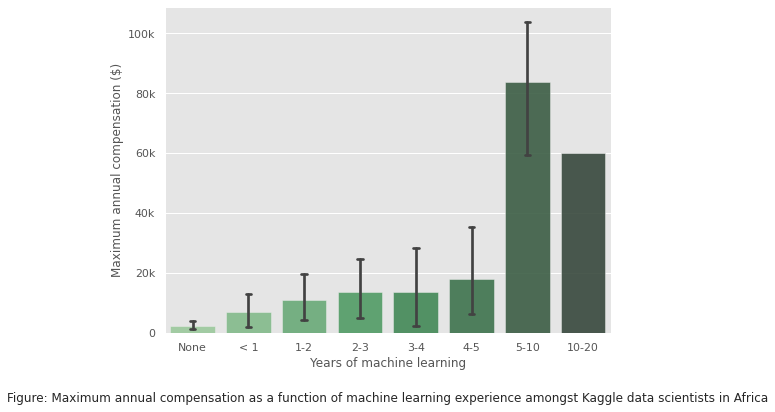

In [ ]:
# Years machine learning on Compensation
Q15notna_africa_compensation_survey_df = africa_compensation_survey_df[~africa_compensation_survey_df.Q15.isna()]

machineYears_Order = ['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years','5-10 years', '10-20 years']
xticklabels = ['None', '< 1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-20']
yticklabels = ['0','20k','40k','60k','80k', '100k']

plt.rcParams["axes.labelsize"] = 12
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=Q15notna_africa_compensation_survey_df, x='Q15', y='E2', ax=ax, alpha = 0.9, order = machineYears_Order, capsize=0.1, palette = 'Greens_d')
ax.set(xlabel="Years of machine learning", ylabel = "Maximum annual compensation ($)", xticklabels = xticklabels, yticklabels = yticklabels)
plt.title('Figure: Maximum annual compensation as a function of machine learning experience amongst Kaggle data scientists in Africa', y=-0.23, fontsize = 12)
plt.show()


Again - unsurprisingly - there appears to be a positive correlation between the number of years that a data scientist has been using machine learning and their salary. Since there is a small number of data scientists who have been in the field for a long time, their low supply increases market competition to acquire their services.  <br /><br />



---



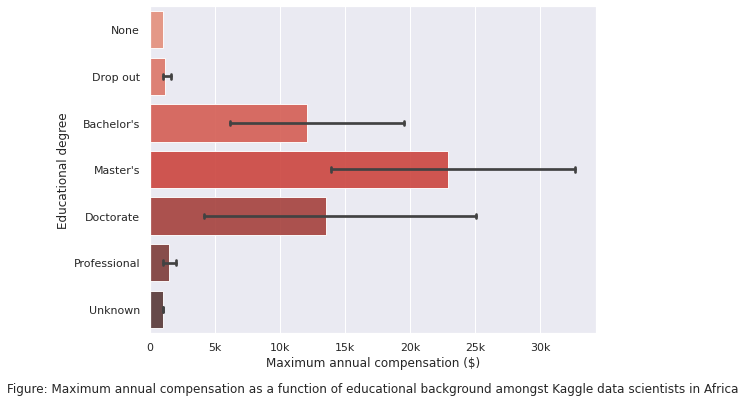

In [ ]:
# Qualification on Compensation
degree_order = {'No formal education past high school':0,
       'Some college/university study without earning a bachelor’s degree':1,
       'Bachelor’s degree':2,
       'Master’s degree':3,
       'Doctoral degree':4,
       'Professional degree':5,
       'I prefer not to answer':6}
education_ordered_africa_compensation_survey_df = africa_compensation_survey_df.sort_values(by=['Q4'], key=lambda x: x.map(degree_order)).reset_index(drop=True)


yticklabels = ['None',
       'Drop out',
       'Bachelor\'s',
       'Master\'s',
       'Doctorate',
       'Professional',
       'Unknown']

xticklabels = ['0','5k','10k','15k','20k', '25k', '30k']

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=education_ordered_africa_compensation_survey_df, x='E2', y='Q4', order= degree_order, alpha = 0.9, capsize=0.1, palette = 'Reds_d', ax=ax)
ax.set(ylabel = "Educational degree", xlabel = "Maximum annual compensation ($)", xticklabels=xticklabels, yticklabels=yticklabels)
plt.title('Figure: Maximum annual compensation as a function of educational background amongst Kaggle data scientists in Africa', fontsize = 12, y = -0.2)
plt.show()

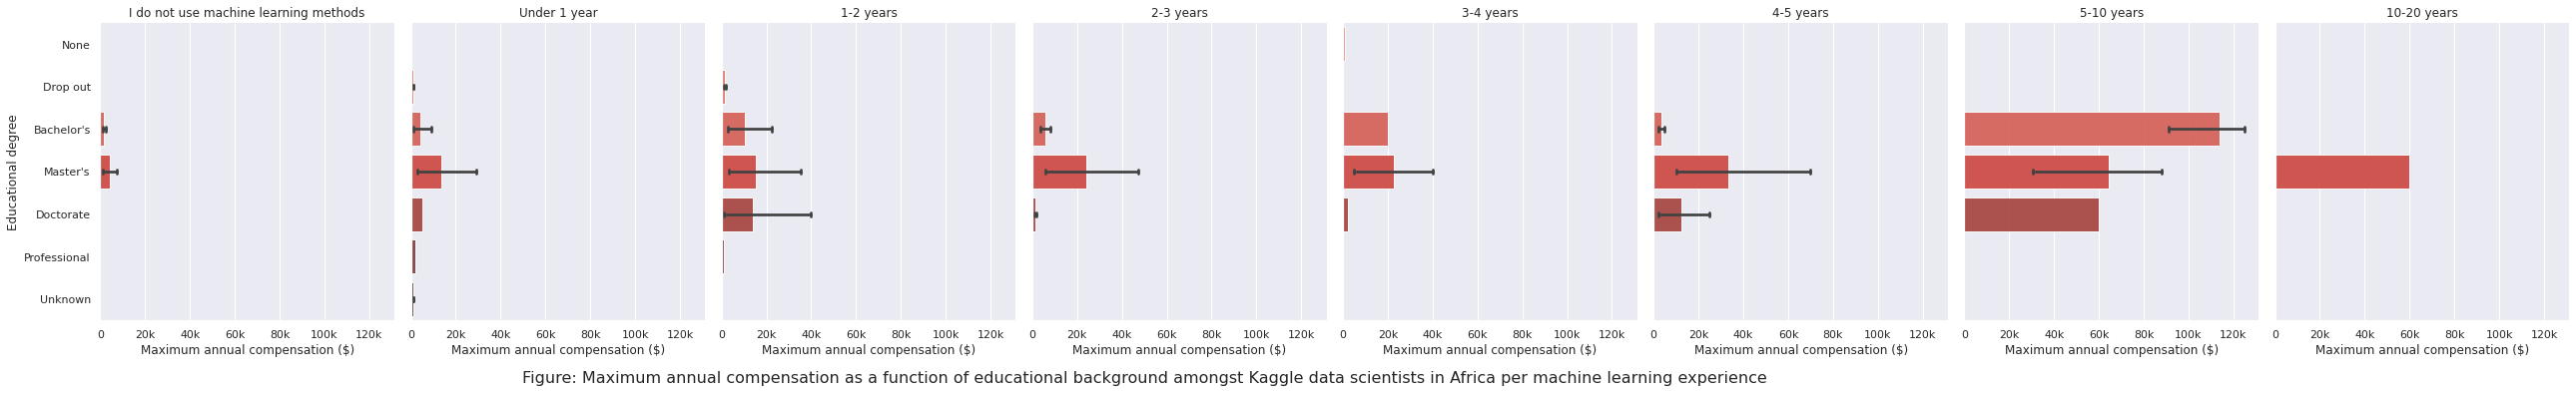

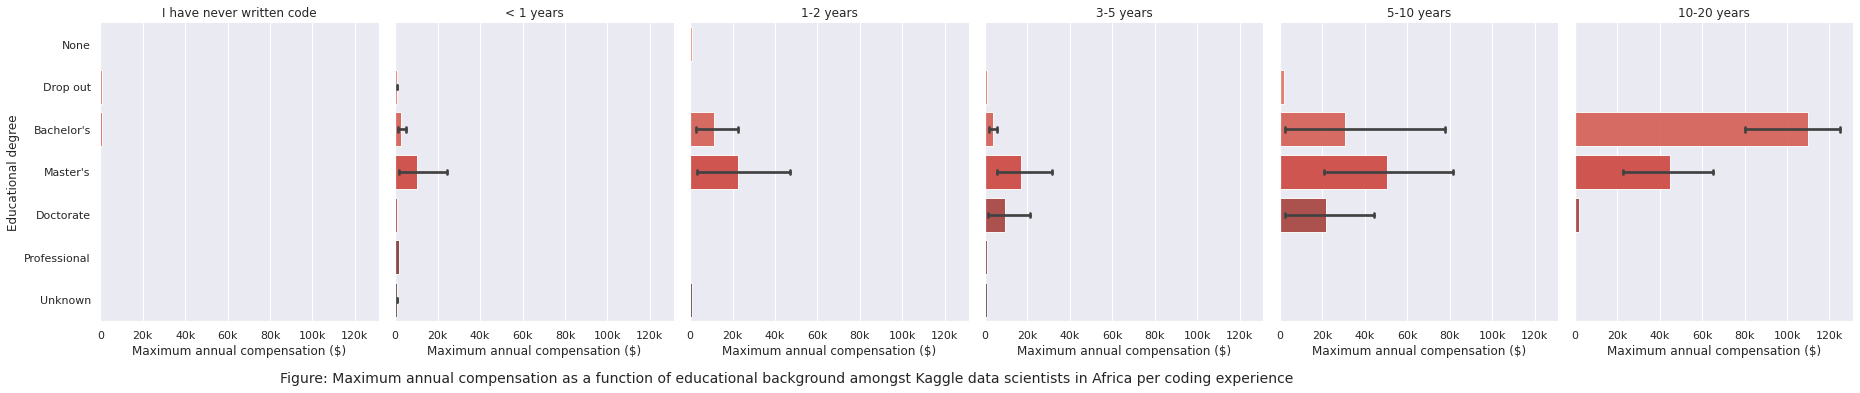

In [ ]:
machineYears_Order = ['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years','5-10 years', '10-20 years']
codingYears_Order = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years']

yticklabels = ['None',
       'Drop out',
       'Bachelor\'s',
       'Master\'s',
       'Doctorate',
       'Professional',
       'Unknown']
xticklabels = ['0','20k','40k','60k','80k', '100k', '120k']

sns.set(rc={'figure.figsize':(70,70)})
plot1 = sns.catplot(data=education_ordered_africa_compensation_survey_df[~education_ordered_africa_compensation_survey_df.Q15.isna()], x='E2', y='Q4', order= degree_order, alpha = 0.9, capsize=0.1, palette = 'Reds_d', kind='bar', col='Q15', col_order = machineYears_Order)
plot1.set(xlabel = "Maximum annual compensation ($)", xticklabels=xticklabels, yticklabels=yticklabels)
plot1.set_titles('{col_name}') 
plot1.set_ylabels("Educational degree")
plt.suptitle('Figure: Maximum annual compensation as a function of educational background amongst Kaggle data scientists in Africa per machine learning experience', fontsize = 16, y = -0.05)
print('\n\n')
plot2 = sns.catplot(data=education_ordered_africa_compensation_survey_df[~education_ordered_africa_compensation_survey_df.Q6.isna()], x='E2', y='Q4', order= degree_order, alpha = 0.9, capsize=0.1, palette = 'Reds_d', kind='bar', col='Q6', col_order = codingYears_Order)
plot2.set(xlabel = "Maximum annual compensation ($)", xticklabels=xticklabels, yticklabels=yticklabels)
plot2.set_titles('{col_name}') 
plot2.set_ylabels("Educational degree")
plt.suptitle('Figure: Maximum annual compensation as a function of educational background amongst Kaggle data scientists in Africa per coding experience', fontsize = 14, y = -0.05)
plt.show()

Having a tertiary qualifications potentially has an impact on increasing the salary of the Kaggle data scientists in Africa. The highest earners have a Master's degree. However, having a doctorate does not necessarily improve the earning ability of the data scientists.  <br /><br />



---



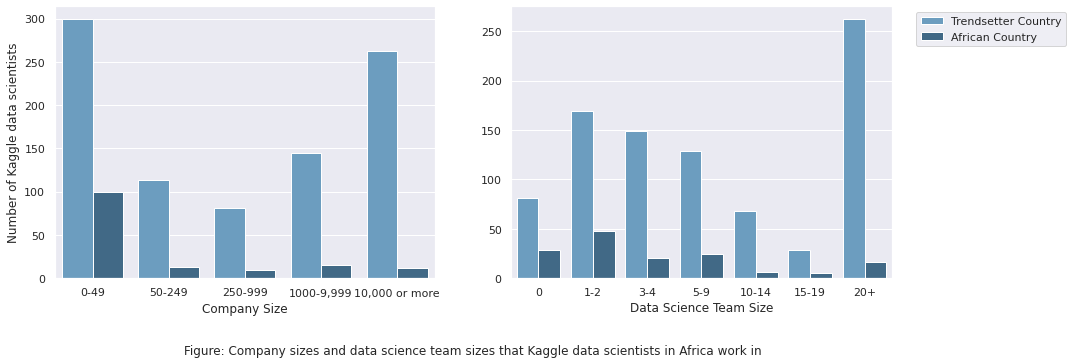

In [ ]:
# Hiring Company sizes and Team sizes
E3 = rowed_columned_survey_df.Q20.str.replace(' employees','').replace(',','')
companySize_order = ['0-49', '50-249', '250-999', '1000-9,999', '10,000 or more']

teamSize_order = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))
sns.countplot(data=E3.to_frame()[E3.to_frame().notna()], x='Q20', ax=ax1, order=companySize_order, palette = 'Blues_d', hue=rowed_columned_survey_df.E1)
ax1.set(xlabel="Company Size", ylabel = "Number of Kaggle data scientists")
ax1.legend().remove()
sns.countplot(data=rowed_columned_survey_df[rowed_columned_survey_df.Q21.notna()], x='Q21', ax=ax2, order=teamSize_order, palette = 'Blues_d', hue=rowed_columned_survey_df.E1)
ax2.set(xlabel="Data Science Team Size", ylabel = None)
ax2.legend(title="", bbox_to_anchor=(1.05, 1))
plt.title('Figure: Company sizes and data science team sizes that Kaggle data scientists in Africa work in', y=-0.30, x=-0.10, fontsize = 12)
plt.show()


The Kaggle data scientists in Africa tend to work for small companies and in small teams. This may mean that most data scientists in Africa have to have a broad skillset to build and operate the entire data science ecosystem (skills mostly associated with software engineers and data engineers), and may likely spend lesser time developing ML models.  <br /><br />



---



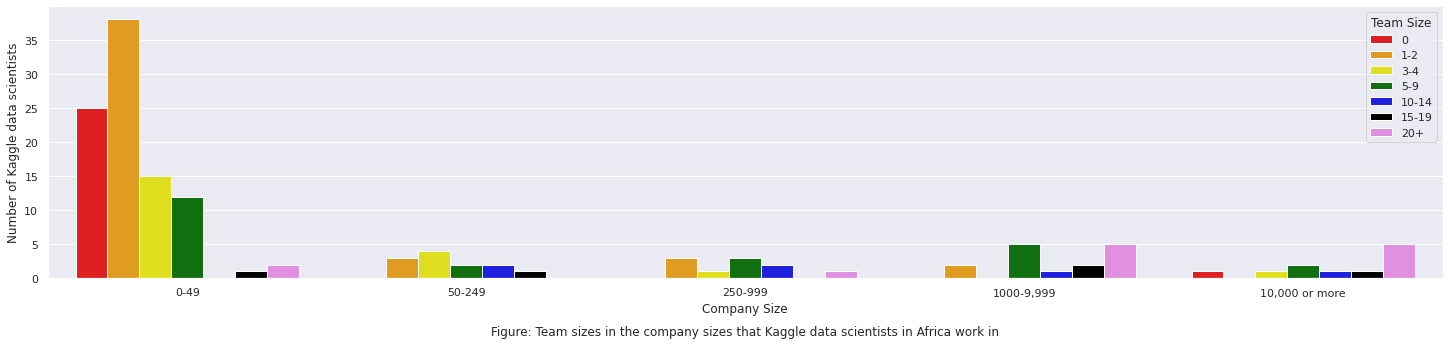

In [ ]:
# Team sizes over Company Sizes
africa_compensation_survey_df['Q20'] = africa_compensation_survey_df.Q20.str.replace(' employees','').replace(',','')
sizes_df = africa_compensation_survey_df[(africa_compensation_survey_df.Q20.notna()) & (africa_compensation_survey_df.Q21.notna())][['Q20','Q21']]
companySize_order = ['0-49', '50-249', '250-999', '1000-9,999', '10,000 or more']
teamSize_order = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']

df = pd.crosstab(sizes_df.Q20, sizes_df.Q21).reset_index().melt(id_vars="Q20").rename(columns={'value':'Count'})

plt.rcParams["axes.labelsize"] = 12
fig, ax = plt.subplots(figsize=(25, 5))
sns.barplot(data=df, x='Q20', y='Count', hue='Q21', hue_order=teamSize_order, ax=ax, order=companySize_order, capsize=0.1, palette=['red','orange', 'yellow', 'green', 'blue','black','violet'])
ax.set(xlabel="Company Size", ylabel = "Number of Kaggle data scientists")
ax.legend(title='Team Size')
plt.title('Figure: Team sizes in the company sizes that Kaggle data scientists in Africa work in', y=-0.23, fontsize = 12)
plt.show()


Of particular note is the small companies (0-49 employees) that have dramatically large data science teams. These are likely start-ups which are heavily focused on selling data-related services - in line with the current high attractiveness of the data science field.  <br /><br />



---



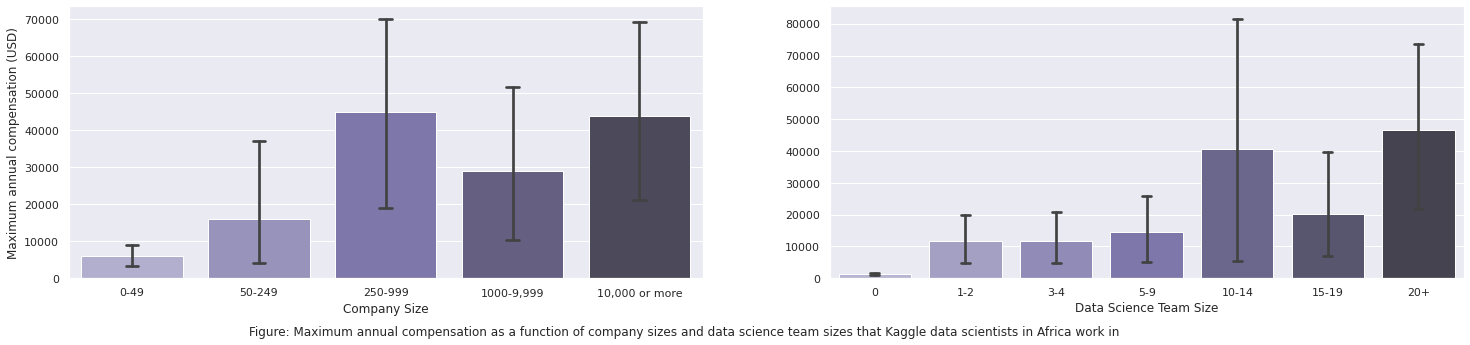

In [ ]:
# Hiring Company sizes and Team sizes on Compensation
africa_compensation_survey_df['Q20'] = africa_compensation_survey_df.Q20.str.replace(' employees','').replace(',','')
companySize_order = ['0-49', '50-249', '250-999', '1000-9,999', '10,000 or more']

teamSize_order = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']

plt.rcParams["axes.labelsize"] = 12
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25, 5))
sns.barplot(data=africa_compensation_survey_df[africa_compensation_survey_df.Q20.notna()], x='Q20', y='E2', ax=ax1, order=companySize_order, palette = 'Purples_d', capsize=0.1)
ax1.set(xlabel="Company Size", ylabel = "Maximum annual compensation (USD)")
sns.barplot(data=africa_compensation_survey_df[africa_compensation_survey_df.Q21.notna()], x='Q21', y='E2', ax=ax2, order=teamSize_order, palette = 'Purples_d', capsize=0.1)
ax2.set(xlabel="Data Science Team Size", ylabel = None)
plt.title('Figure: Maximum annual compensation as a function of company sizes and data science team sizes that Kaggle data scientists in Africa work in', y=-0.23, x= -0.23, fontsize = 12)
plt.show()


Even though the data scientists in Africa tend to be highed more by small companies and small data science teams, it is the the data scientists who are in big companies and big data science teams that tend to earn dramatically more.  <br /><br />



---



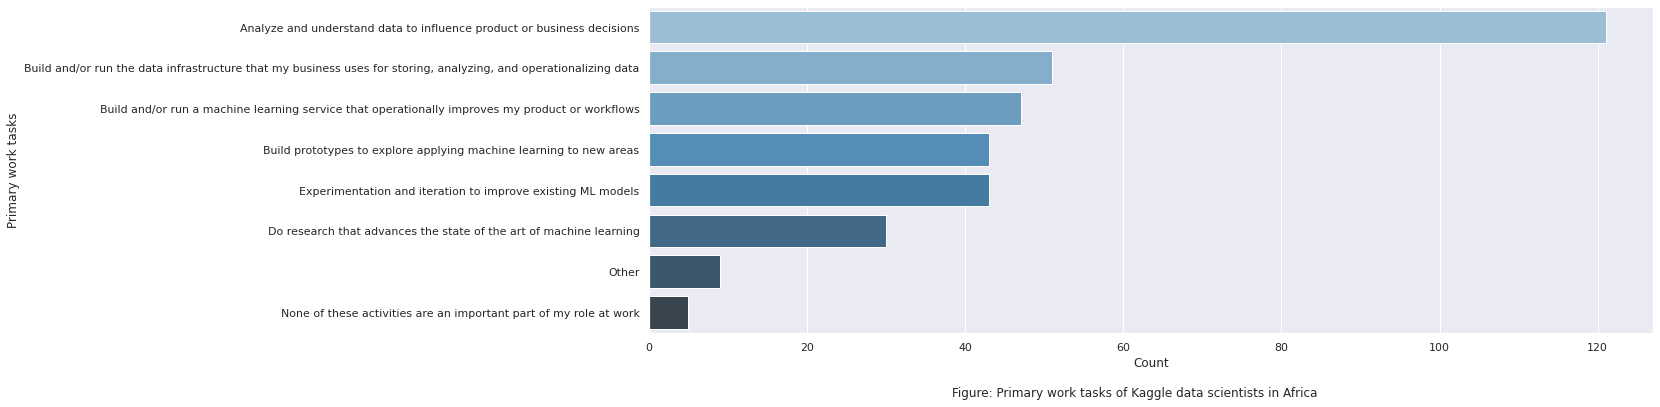

In [ ]:
# Primary work tasks
task_africa_countries_survey_df = africa_countries_survey_df[['Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER']]
melted_task_africa_countries_survey_df = task_africa_countries_survey_df.melt()
melted_task_africa_countries_survey_df = melted_task_africa_countries_survey_df[melted_task_africa_countries_survey_df.value.notna()]

melted_task_africa_countries_survey_df['value'] = melted_task_africa_countries_survey_df.value.astype(CategoricalDtype(categories=['Analyze and understand data to influence product or business decisions',
                                                                                         'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
                                                                                         'Build and/or run a machine learning service that operationally improves my product or workflows',
                                                                                         'Build prototypes to explore applying machine learning to new areas',
                                                                                         'Experimentation and iteration to improve existing ML models',
                                                                                         'Do research that advances the state of the art of machine learning',
                                                                                         'Other',
                                                                                         'None of these activities are an important part of my role at work'], ordered=True))

fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(y='value', data=melted_task_africa_countries_survey_df, ax=ax, palette = 'Blues_d')
ax.set(xlabel="Count", ylabel = "Primary work tasks")
plt.suptitle('Figure: Primary work tasks of Kaggle data scientists in Africa', fontsize = 12, y = 0)
plt.show()


The Kaggle data scientists in Africa spend most of their time on building and maintaining data infrastructure, and using the data to do analyses that feed business insights. This is inline with the previous realization that most of the data scientists work in small companies that also have small data science human resources. Therefore aspiring data scientists should prepare themselves accordingly, and also see this as an opportunity to engage the entire data science ecosystem. <br /><br />



---



## What are the common specialized data science tools being used?

In [ ]:
# Define plotter()
def plotter(first_column, last_column, axis_title, palette = "dark", row = None, row_order = None):
  """Definition: plotter(first_column, last_column, axis_title, palette = "dark")
     
     a) Slice the survey dataframe using the provided first and last column as the column index range.
     b) Melt the sliced columns from a wide format into a long format.
     c) Plot the count of the top 3 common values in the melted columns for both Africa and the trendsetter countries.
     
     PARAMETERS
     first_column : str
                Name of the first column to be included in the sliced data.
     last_column : str
                Name of the last column to be included in the sliced data.
     axis_title : str
                Title of the x axis for the resultant plot.
     palette : palette name, list, or dict, default "dark"
                Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.
     row : str, default None
                The column to be used to disaggregate the facetgrid plots. If left as None, no disaggregation of facetgrid plots will take place.
     row_order : list, default None
                The order in which the disaggregated facetgrid plots should be presented. If row is provided, and the row_order is left as None, then the order of the disaggregated facetgrid plots will follow the order in which the unique values in the column are received.

     RETURNS
     ax: matplotlib Axes
                Returns a matplotlib Axes object with the bar plot drawn onto it.
    """
  melted_column = last_column.split("_")[0]
  target_df = pd.merge(rowed_columned_survey_df.loc[:, first_column : last_column], rowed_columned_survey_df.E1.to_frame(), left_index=True, right_index=True)
  if row is None:
    melted_target_df = target_df.melt(id_vars=['E1'])
    melted_target_df = melted_target_df[melted_target_df.value.notna()]

    grouped_melted_target_df = melted_target_df.groupby(by=['E1','value'])[['value']].count().rename(columns={'value': 'Count'})
    grouped_melted_target_df = grouped_melted_target_df.reset_index().rename(columns={'value': melted_column})
    africatop3_target_df = grouped_melted_target_df[grouped_melted_target_df.E1 == 'African Country'].sort_values('Count', ascending=False)[:3]
    trendsettertop3_target_df = grouped_melted_target_df[grouped_melted_target_df.E1 == 'Trendsetter Country'].sort_values('Count', ascending=False)[:3]

    top3s_target_df = africatop3_target_df.append(trendsettertop3_target_df).reset_index(drop=True)
  else:
    target_df = pd.merge(target_df, rowed_columned_survey_df[row].str.replace(' employees','').replace(',','').to_frame(), left_index=True, right_index=True)

    melted_target_df = target_df.melt(id_vars=['E1',row])
    melted_target_df = melted_target_df[melted_target_df.value.notna()]

    grouped_melted_target_df = melted_target_df.groupby(by=['E1',row,'value'])[['value']].count().rename(columns={'value': 'Count'})
    grouped_melted_target_df = grouped_melted_target_df.reset_index().rename(columns={'value': melted_column})

    unique_row = grouped_melted_target_df[row].unique()
    africa_target_df = grouped_melted_target_df[grouped_melted_target_df.E1 == 'African Country']
    trendsetter_target_df = grouped_melted_target_df[grouped_melted_target_df.E1 == 'Trendsetter Country']
    africatop3s_target_df = pd.DataFrame(columns=africa_target_df.columns)
    trendsettertop3s_target_df = pd.DataFrame(columns=trendsetter_target_df.columns)

    for value in unique_row:
      africatop3s_target_df = africatop3s_target_df.append(africa_target_df[africa_target_df[row] == value].sort_values([row,'Count'], ascending=[True, False])[:3])
      trendsettertop3s_target_df = trendsettertop3s_target_df.append(trendsetter_target_df[trendsetter_target_df[row] == value].sort_values([row,'Count'], ascending=[True, False])[:3])

    top3s_target_df = africatop3s_target_df.append(trendsettertop3s_target_df).reset_index(drop=True)

  warnings.filterwarnings(module='plotnine*', action='ignore', category=FutureWarning)

  print(
    ggplot(melted_target_df)
    + aes(x="E1", fill='value')
    + geom_bar(position="fill")
    + ylab("Proportional Count")
    + xlab("Countries")
    + ggtitle("Figure: Proportional number of used {} by Kaggle data scientists in Africa vs Trendsetter countries".format(axis_title.lower()))
    + coord_flip()
    + theme_classic()
    + theme(legend_title=element_text(text=""))
  )

  sns.set(rc={'figure.figsize':(6,6)})
  plot = sns.catplot(data=top3s_target_df, y = melted_column, x='Count', hue='E1', palette=palette, kind='bar', row=row, row_order=row_order, aspect=2, sharey=False)
  plot.set(ylabel = axis_title.title())
  plot._legend.set_title("")
  plot.set_titles('Company Size: {row_name}') 
  plt.xlabel("Number of Kaggle data scientists")
  plt.suptitle('Figure: Top 3 used {} by Kaggle data scientists in Africa vs the Trendsetter countries'.format(axis_title.lower()), y = -0.05, fontsize = 12)
  plt.show()

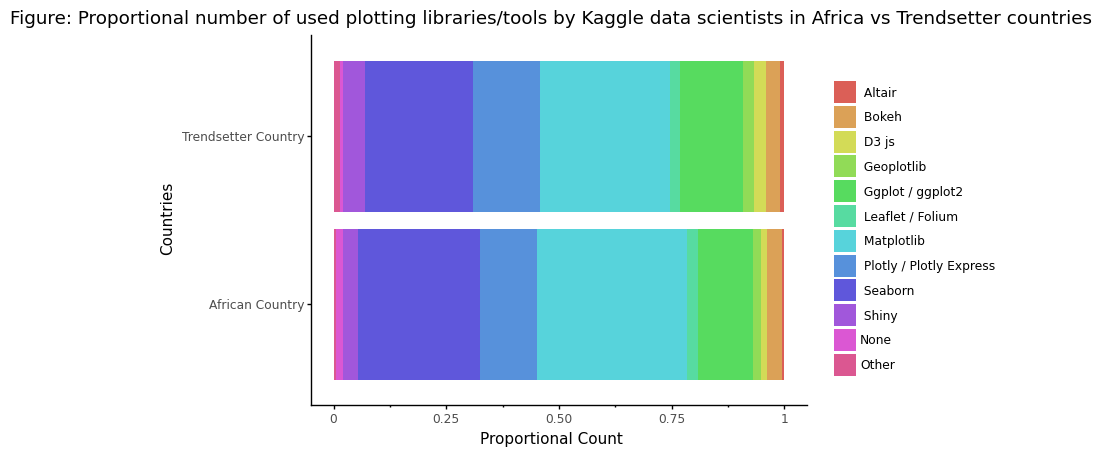

<ggplot: (8756494686461)>


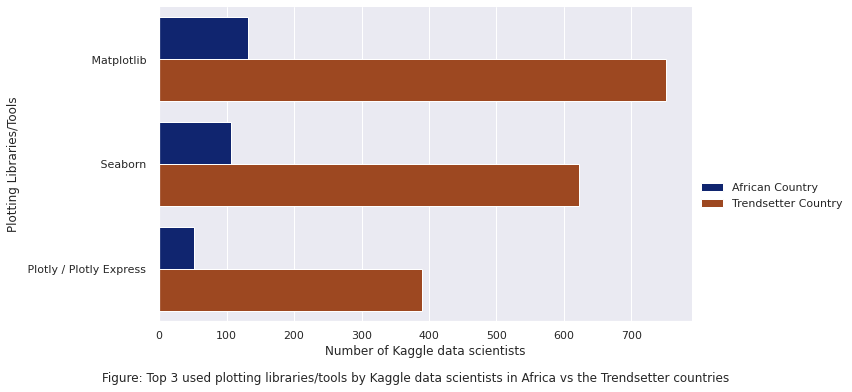

In [ ]:
# Top Plotting Libraries
plotter('Q14_Part_1', 'Q14_OTHER', 'Plotting Libraries/Tools')

Matplotlib and seaborn are the most used plotting libraries in Africa and the Trendsetters, closely followed by Plotly - in line with the high usage of python over R. These 3 plotting libraries should likely be the ones that aspiring data scientists must focus on.   <br /><br />



---



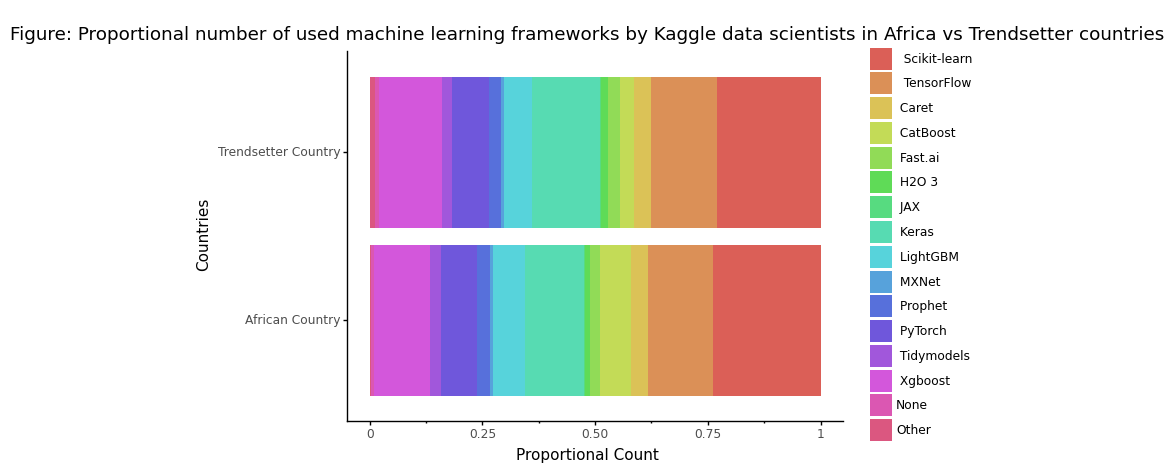

<ggplot: (8756494057445)>


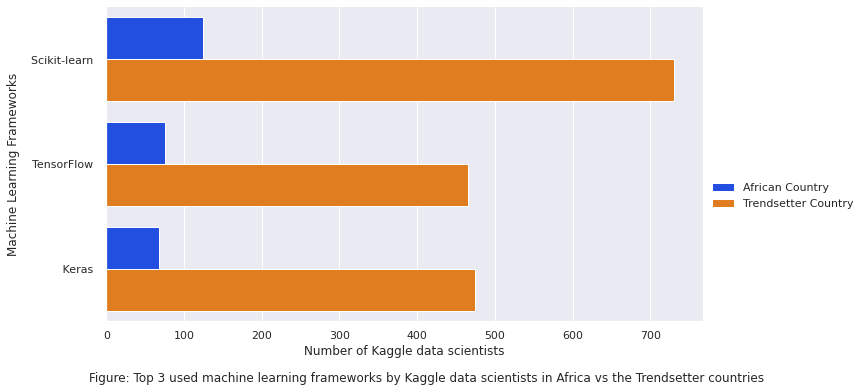

In [ ]:
# Top ML Frameworks
plotter('Q16_Part_1', 'Q16_OTHER', 'Machine learning frameworks', palette = "bright")

Scikit-learn is still the landing data analysis framework for machine learning, followed by keras and tensorflow more so for deep learning. These 3 machine learning frameworks should likely be the ones that aspiring data scientists must focus on.  <br /><br />



---



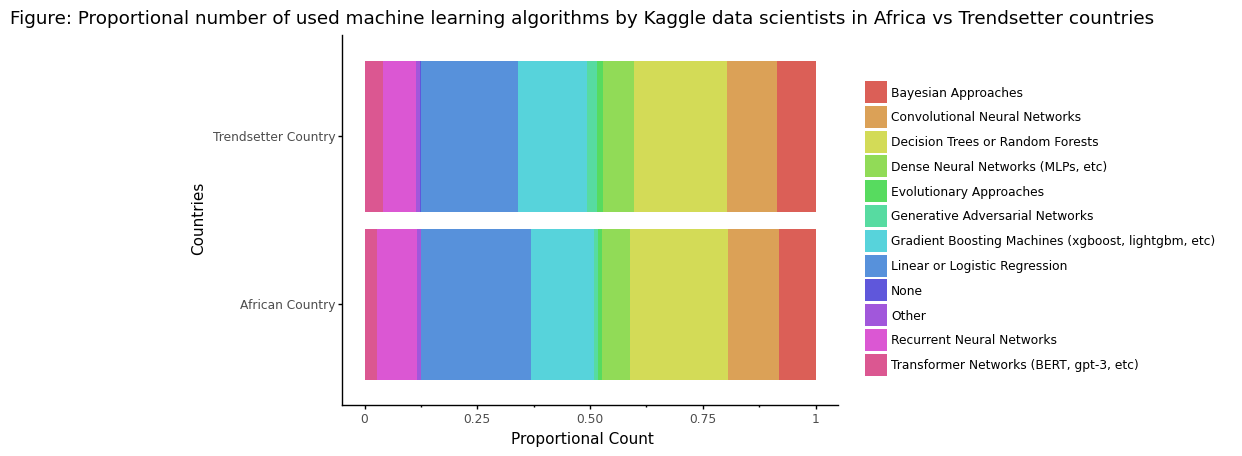

<ggplot: (8756493841465)>


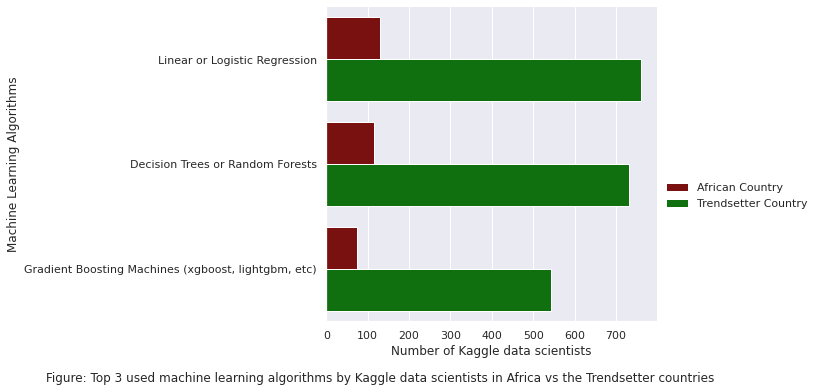

In [ ]:
# Top ML Algorithms
plotter('Q17_Part_1', 'Q17_OTHER', 'Machine learning algorithms', palette = ["darkred","green"])

As relatively simple as they are, the linear/logistic regressions are still the most used ML algorithms, which are closely followed by the decision trees/random forests algorithms. Together with gradient boosting machines, these 3 ML algorithms should likely be the ones that aspiring data scientists must focus on.   <br /><br />



---



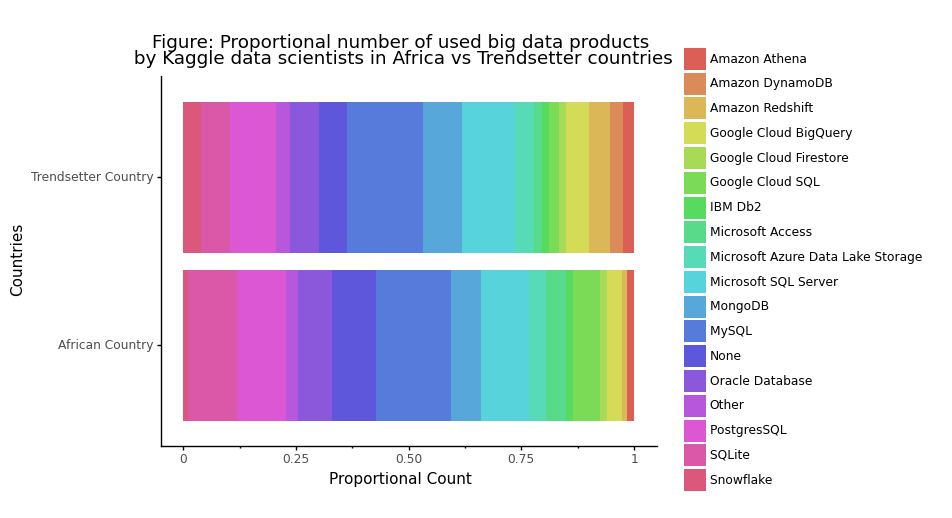

<ggplot: (8756494235009)>


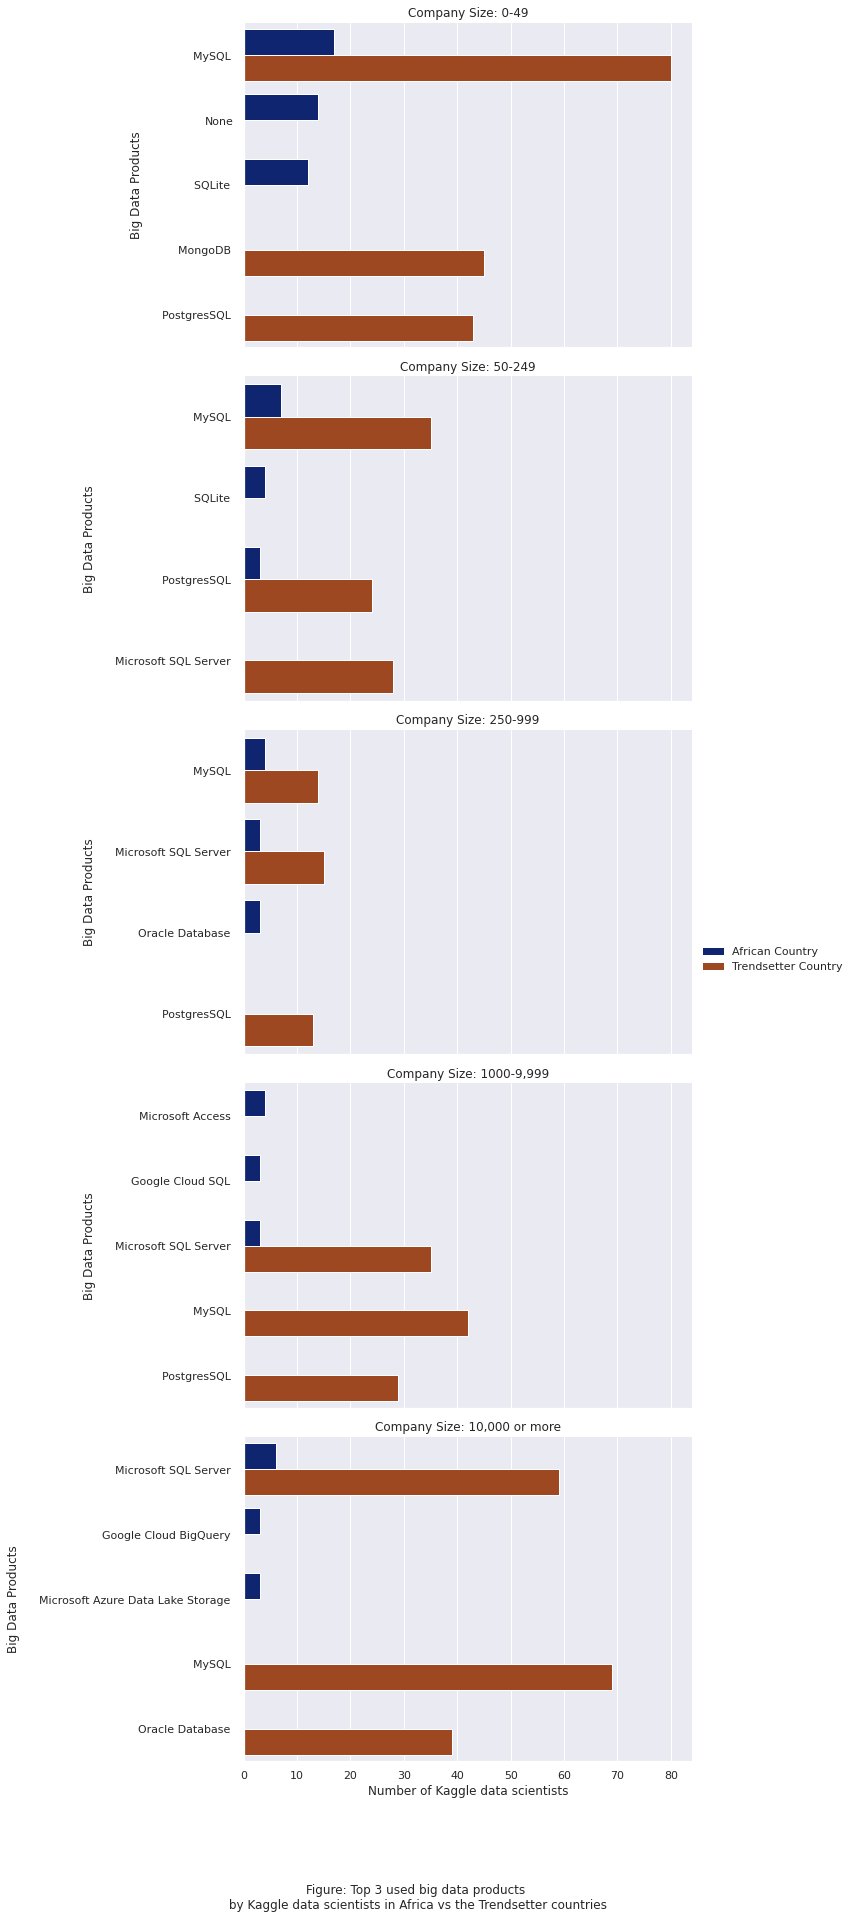

In [ ]:
# Top Big Data products
plotter('Q29_A_Part_1', 'Q29_A_OTHER', 'Big data products\n', row = 'Q20', row_order = companySize_order)

The MySQL and MS SQL Server dominate usage both in Africa and the Trendsetter countries. Even though SQLIte is the third most used in Africa, with time it should follow the Trendsetter pattern of more adoption of PostgresSQL. With the recent surge in usage of PostgresSQL - and it being free and open-source - its ranking is usage is highly likely to increase. Therefore it should be one of the 3 big data products which aspiring data scientists should aim to get familiar with. <br /><br />



---



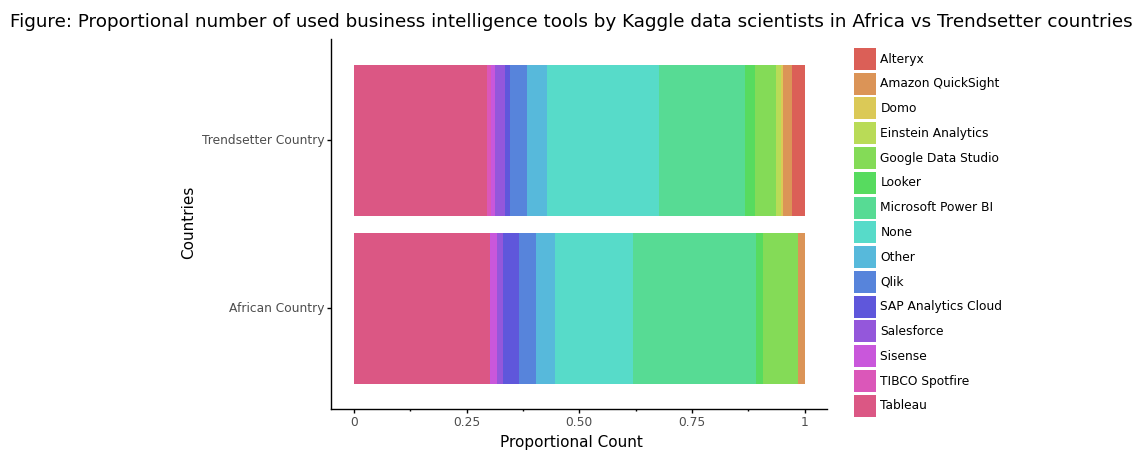

<ggplot: (8756493841617)>


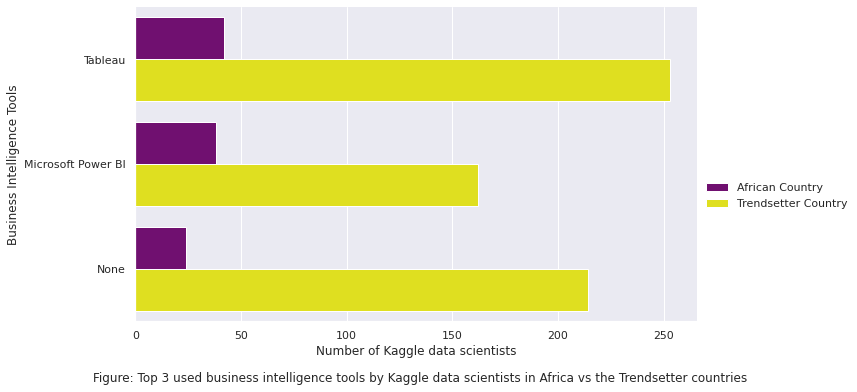

In [ ]:
# Top BI Tools
plotter('Q31_A_Part_1', 'Q31_A_OTHER', 'Business Intelligence Tools', palette = ["purple","yellow"])

Both in Africa and trendsetter countries, Tableau and MS Power BI are the most used for business intelligence tool needs. It's worth noting that a significant proportion of data scientist do not use any BI tools.  <br /><br />



---



## Learning and Exposure platforms?

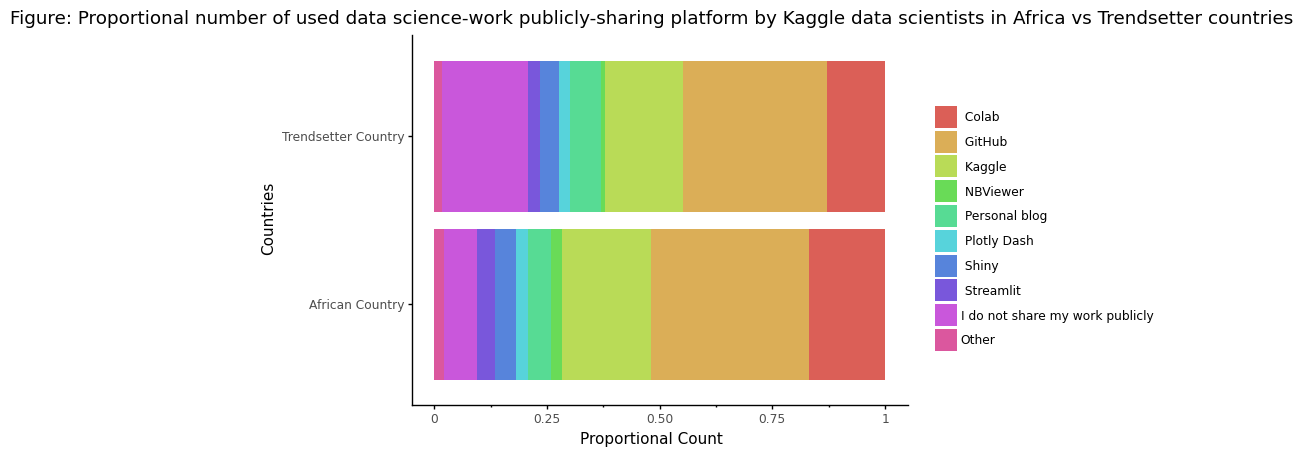

<ggplot: (8756494220317)>


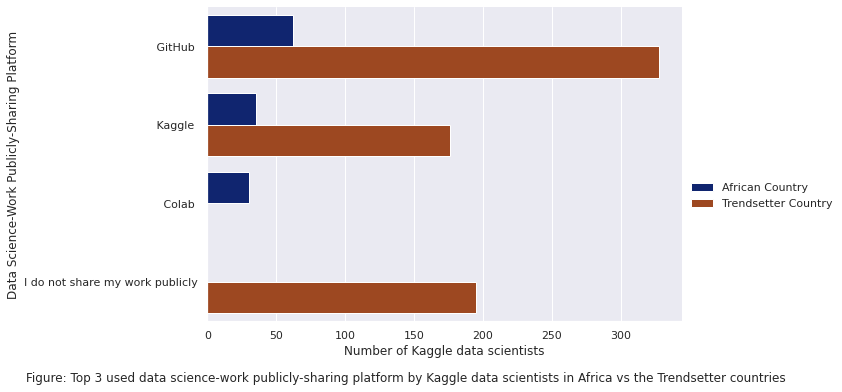

In [ ]:
# Top DS-work publicly-sharing platform
plotter('Q36_Part_1', 'Q36_OTHER', 'Data Science-work publicly-sharing platform')

Github and Kaggle are the most used platform where data scientists publicly share their work. Therefore these are the platforms that aspiring data scientists should use not only to find and learn from othe data scientists' work, but also to eventually start sharing their own work for profiling their work experience.  <br /><br />



---



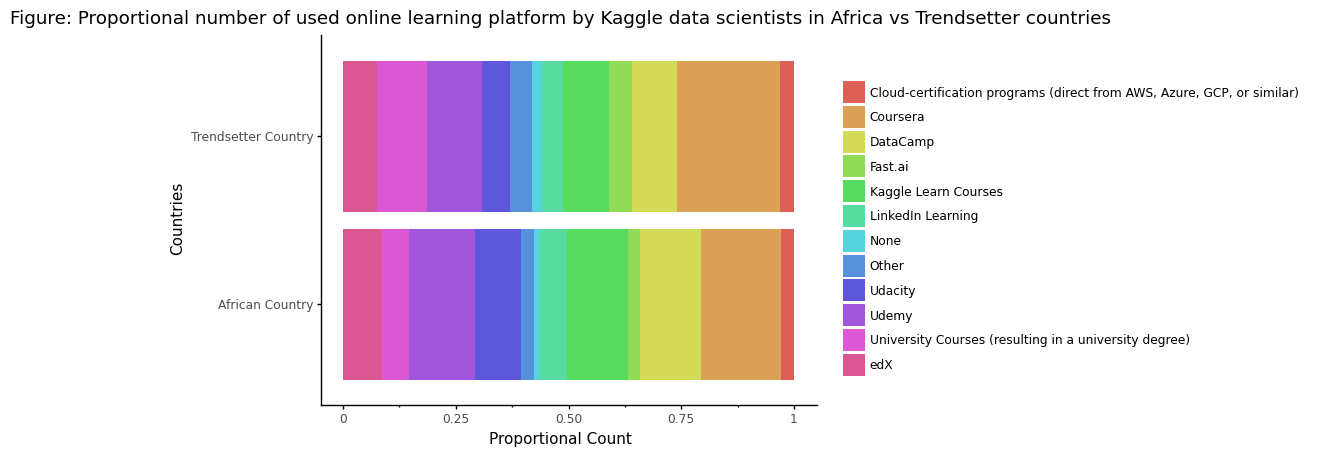

<ggplot: (8756493767941)>


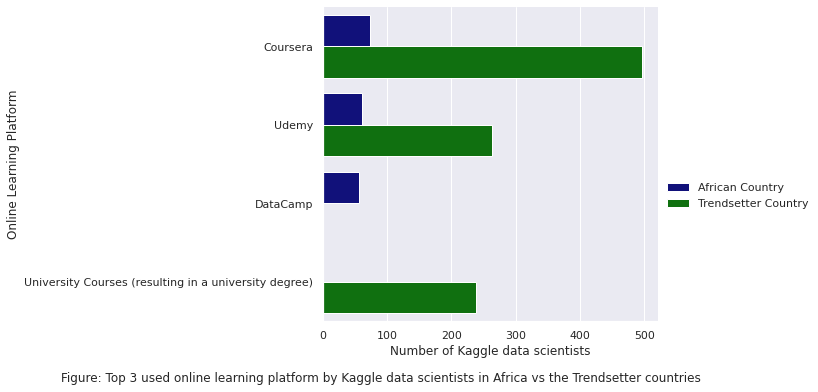

In [ ]:
# Top Online Learning platform
plotter('Q37_Part_1', 'Q37_OTHER', 'Online learning platform', palette = ["darkblue","green"])

Coursera and Udemy are the to-go-to platforms for online learning for data scientists in Africa and the trendsetter countries. Whereas the third most used platform in Africa in DataCamp, in the trendsetter countries it is University Courses which actually result in university degrees. This points to universities starting to play catch up for accomodating the booming data science field.   <br /><br />



---



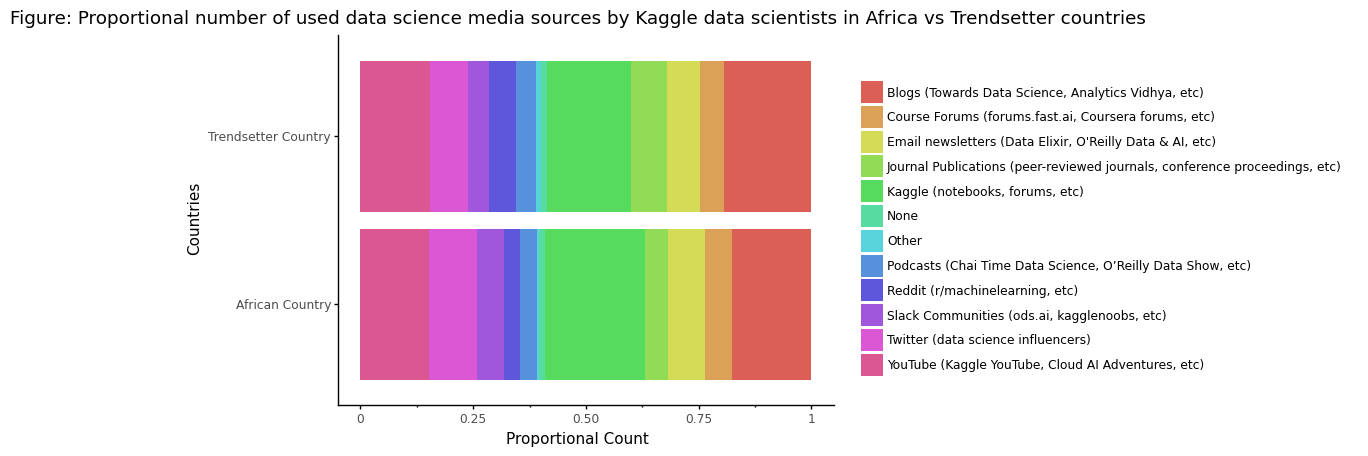

<ggplot: (8756494898921)>


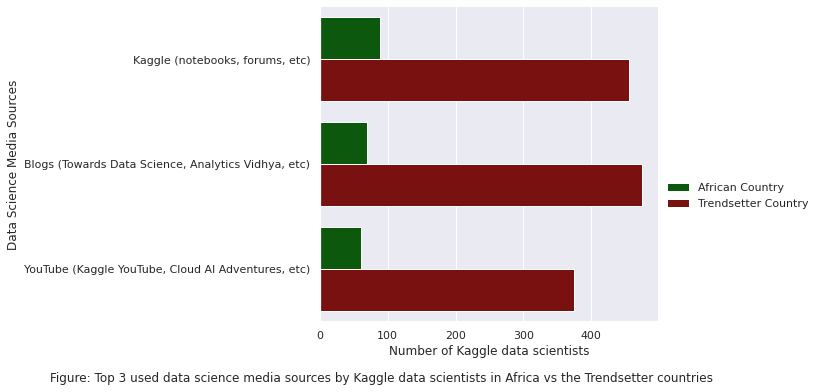

In [ ]:
# Top DS media sources
plotter('Q39_Part_1', 'Q39_OTHER', 'Data science media sources', palette = ["darkgreen","darkred"])

Kaggle, Blogs and YouTube are the common sources of data science media content. These are great platforms for aspiring data scientists to connect to the DS community, even learn snippets of DS concepts, and also keep abreast with the current conversations in the field.   <br /><br />



---

